In [1]:
# 导入必要的库
import numpy as np # 用于科学计算
import networkx as nx # 用于网络分析和可视化
import copy
import pickle
import pandas as pd

import networkx as nx
import random

from libpysal import weights, examples
from libpysal.cg import voronoi_frames

from contextily import add_basemap
import geopandas as gpd
# import geoplot as gplt
from shapely.wkt import loads

# 导入matplotlib.pyplot模块
import matplotlib.pyplot as plt
# 设置全局字体为time newroman，字体为粗体
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"

d:\miniconda\miniconda\envs\ordinary\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
d:\miniconda\miniconda\envs\ordinary\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
d:\miniconda\miniconda\envs\ordinary\lib\site-package

In [3]:
# with open('data/layerX_restaurant', 'rb') as f:
#     layer_x = pickle.load(f)

with open('data/layerY_mobility', 'rb') as f:
    layer_y = pickle.load(f)

# with open('data/layer_z', 'rb') as f:
#     layer_z = pickle.load(f)

with open('data/index_state_dict', 'rb') as f:
    state_layerx = pickle.load(f)

with open('data/risk_layer_y_pre', 'rb') as f:
    risk_layer_y_pre = pickle.load(f)

with open('data/risk_layer_y_post', 'rb') as f:
    risk_layer_y_post = pickle.load(f)

with open('data/point_index_dict', 'rb') as f:
    point_index_dict = pickle.load(f)

with open('data/geom_dict_layery', 'rb') as f:
    geom_y_dict = pickle.load(f)

with open('data/index_state_dict', 'rb') as f:
    index_state_dict = pickle.load(f)

with open('data/index_point_dict', 'rb') as f:
    index_point_dict = pickle.load(f)


In [4]:
with open('test_data_3/y_states', 'rb') as f:
    y_states = pickle.load(f)

with open('test_data_3/x_states', 'rb') as f:
    x_states = pickle.load(f)

In [5]:
# with open('data/dt_2019_mini', 'rb') as f:
#     dt_2019_mini_ini = pickle.load(f).reset_index(drop = True)

with open('data/dt_2019', 'rb') as f:
    dt_2019_ini = pickle.load(f).reset_index(drop = True)

with open('data/data_lockdown_empirical_2021', 'rb') as f:
    dt_2021_ini = pickle.load(f).reset_index(drop = True)


In [34]:
dt_2019_ini

,name,type,adname,adcode,typecode,address,lon,lat,geometry,year,name_,name_length,life,states,points,geom_index
0,卡巴吉娜,餐饮服务;外国餐厅;意式菜品餐厅,罗湖区,440303.0,50205,梧桐山赤水洞92号宏博昌荣传媒文化硅谷一楼,114.186772,22.595012,POINT (114.186771899693 22.5950122886042),2019,卡巴吉娜,4,death,death,POINT (114.186771899693 22.5950122886042),1337.0
1,萨莉亚意式餐厅(茂业百货),餐饮服务;外国餐厅;意式菜品餐厅,福田区,440304.0,50205,深南中路2020号茂业百货F5层,114.087797,22.543867,POINT (114.08779737107 22.5438669246056),2019,萨莉亚意式餐厅(茂业百货),13,death,death,POINT (114.08779737107 22.5438669246056),2003.0
2,星巴克咖啡(深圳百花店),餐饮服务;咖啡厅;星巴克咖啡,福田区,440304.0,50501,百花二路百花园一期1层,114.089992,22.556406,POINT (114.089991700772 22.5564055989428),2019,星巴克咖啡(深圳百花店),12,remaining,remaining,POINT (114.089991700772 22.5564055989428),2310.0
3,星巴克咖啡(深圳欢乐谷店),餐饮服务;咖啡厅;星巴克咖啡,南山区,440305.0,50501,侨城西街18号欢乐谷公园商业街1-2区欢摩乐信,113.974386,22.541968,POINT (113.974385605237 22.5419680117065),2019,星巴克咖啡(深圳欢乐谷店),13,remaining,remaining,POINT (113.974385605237 22.5419680117065),2049.0
4,星巴克咖啡(九方购物中心),餐饮服务;咖啡厅;星巴克咖啡,福田区,440304.0,50501,中航路15号中航苑鼎诚大厦1层,114.077848,22.545644,POINT (114.077847952666 22.5456443212313),2019,星巴克咖啡(九方购物中心),13,death,death,POINT (114.077847952666 22.5456443212313),684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183147,拾月甜品,餐饮服务;餐饮相关场所;餐饮相关,福田区,440304.0,50000,深南大道车公庙都市阳光名苑3座13E,114.020563,22.537953,POINT (114.020563358431 22.5379533772925),2019,拾月甜品,4,remaining,remaining,POINT (114.020563358431 22.5379533772925),1862.0
183148,大小姐的店(立业路店),餐饮服务;中餐厅;湖南菜(湘菜),宝安区,440306.0,50108,立业路8号兆丰祥商务大厦2层,113.849398,22.766340,POINT (113.849398417583 22.7663397261255),2019,大小姐的店(立业路店),11,death,death,POINT (113.849398417583 22.7663397261255),472.0
183149,牛肉传(南光城市花园店),餐饮服务;快餐厅;快餐厅,南山区,440305.0,50300,南山街道南光城市花园1栋06商铺,113.918892,22.522243,POINT (113.918892304122 22.5222428951393),2019,牛肉传(南光城市花园店),12,remaining,remaining,POINT (113.918892304122 22.5222428951393),1012.0
183150,湘川潮汕卤水,餐饮服务;中餐厅;潮州菜,宝安区,440306.0,50123,万丰中路460号,113.818971,22.725866,POINT (113.818971338433 22.72586578217109),2019,湘川潮汕卤水,6,remaining,remaining,POINT (113.818971338433 22.72586578217109),1908.0


In [4]:
# dt_2019_mini = dt_2019_mini_ini.copy()
# dt_2019_mini = dt_2019_mini.loc[~pd.isna(dt_2019_mini['geom_index']), ]

In [4]:
dt_2019 = dt_2019_ini.copy()
dt_2019 = dt_2019.loc[~pd.isna(dt_2019['geom_index']), ]

In [5]:
dt_2021 = dt_2021_ini.copy()
dt_2021 = dt_2021.loc[~pd.isna(dt_2021['geom_index']), ]

In [2]:
# with open('data/dist_dict_layerz', 'rb') as f:
#     dist_dict_layerz = pickle.load(f)
# between_dict = dist_dict_layerz.copy()
# for key, value in between_dict.items():
#     between_dict[key] = float(np.where(value < 1000, 1, 0))  # 我们把距离阈值设为2km
# layerZ = []

# for key, value in between_dict.items():
#     item = {} #注意item应该放在循环里边进行创建
#     item['SourceNode'] = key[0]
#     item['TargetNode'] = key[1]
#     item['Weight'] = value
#     item['SourceLayer'] = 'restaurant'
#     item['TargetLayer'] = 'mobility'
#     layerZ.append(item)
# layerZ = pd.DataFrame(layerZ)

In [6]:
# 定义一个函数来更新移动网络Y上每个节点的状态，根据bond percolation规则以及恢复率gamma
def infection(i, p_hj, new_y_state, R0):
    '''
    如果该节点已经被感染，会对周围节点传播病毒
    '''
    probabilities = np.tanh(p_hj[i])
    sample_results = np.random.multinomial(R0, probabilities)
    index = np.where(sample_results > 0)
    new_y_state[index] = 0
    return new_y_state

def recover(i, new_y_state, gamma):
    # 它会产生恢复过程
    if np.random.rand() < gamma: # 如果随机数小于恢复率
        new_y_state[i] = 1 # 更新状态为正常
    else: # 如果随机数大于或等于恢复率
        new_y_state[i] = 0 # 保持状态不变
    return new_y_state


def update_y_state_noquarantine(y_state, R0, gamma):
    new_y_state = copy.deepcopy(y_state) # 复制当前状态向量
    # new_p_hj = copy.deepcopy(p_hj)


    for i in range(N): # 遍历每个节点
        if y_state[i] == 0: # 如果当前状态是感染

            if np.random.rand() > 0.5: # 生成随机数，决定是先感染其他节点还是先恢复
                new_y_state = recover(i, new_y_state, gamma)
                new_y_state = infection(i, p_hj, new_y_state, R0)
            else:
                new_y_state = infection(i, p_hj, new_y_state, R0)
                new_y_state = recover(i, new_y_state, gamma)

        else: # 如果当前状态是正常
            neighbors = [*range(N)]
            neighbors.remove(i)
            # 对于它的每个邻居节点v
            for v in neighbors:
                # 如果邻居节点v是感染状态
                if new_y_state[v] == 0:
                    # 按照commute probability p_{h, j}进行随机抽样
                    sample_results = np.random.multinomial(R0, p_hj[v])
                    # 如果sample_results中大于0的节点u
                    if sample_results[i] > 0:
                        #if np.random.rand() < beta:
                        # 更新它的状态为被感染
                        new_y_state[i] = 0
    return new_y_state # 返回更新后的状态向量



def update_y_state_isolation(y_state, zeta, R0, gamma):
    new_y_state = copy.deepcopy(y_state)
    new_p_hj = copy.deepcopy(p_hj)
    new_Y_adj = copy.deepcopy(Y_adj)
    unormal_nodes = [i for i in range(N) if new_y_state[i] == 0]

    if zeta > 0:
        quarantine_nodes = np.random.choice(unormal_nodes, int(zeta * len(unormal_nodes)), replace = False)
        for u in quarantine_nodes:
            new_p_hj[u] = np.zeros(N)
            new_p_hj[:, u] = np.zeros(N)

            new_Y_adj[u] = np.zeros(N)
            new_Y_adj[:, u] = np.zeros(N)
    
        # 在修改完p_hj后，在新的p_hj上进行状态更新
        for i in range(N):

            if (y_state[i] == 0) and (i in quarantine_nodes):   # 如果i节点被感染且在被删除节点集里边，它不会受到感染也不会感染别人，会进行恢复过程
                new_y_state = recover(i, new_y_state, gamma)
            
            if (y_state[i] == 0) and (i not in quarantine_nodes):  # 如果i节点被感染但不在删除节点集里边，它会产生恢复过程也会感染他人
                if np.random.rand()  > 0.5:
                    new_y_state = recover(i, new_y_state, gamma)
                    new_y_state = infection(i, new_p_hj, new_y_state, R0)
                else:
                    new_y_state = infection(i, new_p_hj, new_y_state, R0)
                    new_y_state = recover(i, new_y_state, gamma)
            
            if y_state[i] == 1 :  # 如果i节点没被感染，那它可能被邻居节点所感染
                neighbors = [*range(N)]
                neighbors.remove(i)
                for q_node in quarantine_nodes:
                    neighbors.remove(q_node)
                # 对于它的每个邻居节点v
                for v in neighbors:
                    # 如果邻居节点v是感染状态
                    if new_y_state[v] == 0:
                        # 按照commute probability p_{h, j}进行随机抽样
                        sample_results = np.random.multinomial(R0, new_p_hj[v])
                        # 如果sample_results中大于0的节点u
                        if sample_results[i] > 0:
                            #if np.random.rand() < beta:
                            # 更新它的状态为被感染
                            new_y_state[i] = 0

    else:
        for i in range(N): # 遍历每个节点
            if y_state[i] == 0: # 如果当前状态是感染

                if np.random.rand() > 0.5: # 生成随机数，决定是先感染其他节点还是先恢复
                    new_y_state = recover(i, new_y_state, gamma)
                    new_y_state = infection(i, p_hj, new_y_state, R0)
                else:
                    new_y_state = infection(i, p_hj, new_y_state, R0)
                    new_y_state = recover(i, new_y_state, gamma)

            else: # 如果当前状态是正常
                neighbors = [*range(N)]
                neighbors.remove(i)
                # 对于它的每个邻居节点v
                for v in neighbors:
                    # 如果邻居节点v是感染状态
                    if new_y_state[v] == 0:
                        # 按照commute probability p_{h, j}进行随机抽样
                        sample_results = np.random.multinomial(R0, p_hj[v])
                        # 如果sample_results中大于0的节点u
                        if sample_results[i] > 0:
                            #if np.random.rand() < beta:
                            # 更新它的状态为被感染
                            new_y_state[i] = 0

    return new_y_state, new_Y_adj # 返回更新后的状态向量以及


        

# # 定义一个函数来更新餐馆网络X上每个节点的状态，根据恢复率gamma_X_i_r(t)和破坏率gamma_X_d
# def update_x_state(x_state, y_state):
#     gamma_X_d = 0.5 # 设定破坏率为0.5
#     gamma_X_r_0 = 0.5 # 设定弹性恢复率为0.5
#     alpha = 0.2 # 设定修复资源损失系数为0.5

#     new_x_state = copy.deepcopy(x_state) # 复制当前状态向量

#     for i in range(M): # 遍历每个节点
#         if x_state[i] == 0: # 如果当前状态是关闭
#             #y_avg_i = (Z_adj[i] @ y_state) / (Z_adj[i].sum() + 1) # 计算耦合网络Y上相邻节点的平均状态，拥有更多有效Y节点的餐馆更容易恢复，我觉得这个需要修改
#             y_avg_i = (Z_adj[i] @ y_state) / N
#             gamma_X_i_r = gamma_X_r_0 * (1 - alpha * (1 - y_avg_i)) # 计算修复率
#             recovery_prob = np.random.rand() # 生成一个随机数
#             if recovery_prob < gamma_X_i_r: # 如果随机数小于修复率 
#                 new_x_state[i] = 1 # 更新状态为开放 
#             else: # 如果随机数大于或等于修复率               
#                 new_x_state[i] = 0 # 保持状态不变                
#         else: # 如果当前状态是开放
#             death_num = round(M * R_r)
#             degree = Z_adj.sum(axis=1) + 1
#             degree_ = 1 / degree
#             prob = degree_ / sum(degree_)
#             death_index = np.random.multinomial(death_num, prob)                
#             if death_index[i] > 0: # 如果随机数为1               
#                 new_x_state[i] = 0 # 更新状态为关闭               
#             else: # 如果随机数大于或等于破坏率               
#                 new_x_state[i] = 1 # 保持状态不变  
#     return new_x_state # 返回更新后的状态向量


def update_x_state_RDB_noqurantine(x_state, y_state, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha, Z_adj):
    '''建立存活->死亡->新生的迭代过程
    remaining, death, birth = x_state[0], x_state[1], x_state[2]
    \dot{remaining} = - remaining * gamma_X_d + death * gamma_X_i_r + birth
    \dot{death} = remaining * gamma_X_d - death * gamma_X_i_b
    \dot{birth} = death * gamma_X_i_b

    :param alpha: 耦合系数
    '''
    # gamma_X_i_rs = []
    # y_avg_is = []
    
    new_y_state = copy.deepcopy(y_state)
    new_Y_adj = copy.deepcopy(Y_adj)
    new_p_hj = copy.deepcopy(p_hj)
    new_Z_adj = copy.deepcopy(Z_adj)
    # 这里应该对所有失灵节点上对应于Z_adj上的连边进行切除，这样才能代表资源受损的过程
    unormal_nodes = [i for i in range(N) if new_y_state[i] == 0]
    for u in unormal_nodes:
        new_Z_adj[u] = np.zeros(N)


    new_x_state = copy.deepcopy(x_state) # 复制当前状态向量
    for i in range(len(x_state)):

        if x_state[i] == 'death':
            # 我需要提取与i节点在Y网络上相连的Y网络上的节点j
            index_y = np.where(new_Z_adj[i] > 0)[0]
            if len(index_y) > 0:
                y_functionality = []
                # 我要判断节点i所连Y网络中节点的有效性
                for y in range(len(index_y)):
                    y_function = new_y_state[index_y]
                    y_functionality.append(y_function)

                y_avg_i = np.sum(y_functionality) / len(index_y)
            else:
                y_avg_i = 0

            #y_avg_i = (Z_adj[i] @ y_state) / (Z_adj[i].sum() + 1) # 计算耦合网络Y上相邻节点的平均状态，拥有更多有效Y节点的餐馆更容易恢复
            #y_avg_i = (Z_adj[i] @ y_state) / N


            gamma_X_i_r = gamma_X_r_0 * (1 - alpha * (1 - y_avg_i)) # 计算耦合后的保留率
            if np.random.random() < gamma_X_i_r:
                new_x_state[i] = 'remaining'
        
        else:
            if np.random.random() < gamma_X_d:
                new_x_state[i] = 'death'

    return new_x_state


def update_x_state_RDB_isolation(x_state, y_state, new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha, Z_adj):
    '''建立存活->死亡->新生的迭代过程
    remaining, death, birth = x_state[0], x_state[1], x_state[2]
    \dot{remaining} = - remaining * gamma_X_d + death * gamma_X_i_r + birth
    \dot{death} = remaining * gamma_X_d - death * gamma_X_i_b
    \dot{birth} = death * gamma_X_i_b

    :param alpha: 耦合系数
    '''
    new_p_hj = new_Y_adj / (new_Y_adj.sum(axis=1, keepdims=True) + 1) # 获得新的new_p_hj
    new_y_state = copy.deepcopy(y_state)
    new_Z_adj = copy.deepcopy(Z_adj)
    new_x_state = copy.deepcopy(x_state) # 复制当前状态向量
    unormal_nodes = [i for i in range(N) if new_y_state[i] == 0]
    for u in unormal_nodes:
        new_Z_adj[u] = np.zeros(N)


    for i in range(len(x_state)):

        if x_state[i] == 'death':
            # 我需要提取与i节点在Y网络上相连的Y网络上的节点j
            index_y = np.where(new_Z_adj[i] > 0)[0]
            if len(index_y) > 0:
                y_functionality = []
                # 我要判断节点i所连Y网络中节点的有效性
                for y in range(len(index_y)):
                    y_function = new_y_state[index_y]
                    y_functionality.append(y_function)

                y_avg_i = np.sum(y_functionality) / len(index_y)
            else:
                y_avg_i = 0


            #y_avg_i = (Z_adj[i] @ y_state) / (Z_adj[i].sum() + 1) # 计算耦合网络Y上相邻节点的平均状态，拥有更多有效Y节点的餐馆更容易恢复
            #y_avg_i = (Z_adj[i] @ y_state) / N


            gamma_X_i_r = gamma_X_r_0 * (1 - alpha * (1 - y_avg_i)) # 计算耦合后的保留率
            if np.random.random() < gamma_X_i_r:
                new_x_state[i] = 'remaining'
        
        else:
            if np.random.random() < gamma_X_d:
                new_x_state[i] = 'death'
            


    return new_x_state




# 定义一个函数来计算两层网络中感染或关闭节点比例随时间变化的曲线图，以及绘制两层网络中不同状态节点的分布图等

def plot_results(y_states, x_states, legend = True):
    
    T = len(y_states) # 获取时间步数量
    
    infected_ratio_Y = np.zeros(T) # 初始化移动网络Y上感染比例数组
    # remaining_ratio_X = np.zeros(T) # 初始化餐馆网络X上remaining比例数组
    death_ratio_X = np.zeros(T) # 初始化餐馆网络X上death比例数组
    # birth_ratio_X = np.zeros(T) # 初始化餐馆网络X上birth比例数组
    # remaining_nums = np.zeros(T)
    death_nums = np.zeros(T)
    # birth_nums = np.zeros(T)



    for t in range(T): # 遍历每个时间步
        # remaining_num = sum([x[0] for x in x_states[t]])
        death_num = sum([x=='death' for x in x_states[t]])
        # birth_num = sum([x[2] for x in x_states[t]])
        # remaining_nums[t] = remaining_num
        death_nums[t] = death_num
        # birth_nums[t] = birth_num

        all_num = len(x_states[t])
    
        infected_ratio_Y[t] = 1 - y_states[t].mean() # 计算移动网络Y上感染比例
        
        # remaining_ratio_X[t] = remaining_num / all_num # 计算餐馆网络X上remaining比例
        death_ratio_X[t] = death_num / all_num
        # birth_ratio_X[t] = birth_num / all_num

    plt.rc('font', family='Times New Roman') # 设置全局字体为times-newroman
    plt.rcParams['font.size'] = 24 # 设置字体大小
    plt.rcParams['font.weight'] = 'bold' # 设置字体粗细

    plt.figure(figsize=(12,10)) # 设置画布大小
    
    plt.subplot(111) # 设置子图位置
    plt.plot(range(T), infected_ratio_Y, label="Infected_Ratio_Y", color = '#E64B35', linewidth = 5) # 绘制移动网络Y上感染比例曲线
    # plt.plot(range(T), remaining_ratio_X, label="Remaining_Ratio_X", color = '#F39B7F', linewidth = 5) # 绘制餐馆网络X上remaining比例曲线
    plt.plot(range(T), death_ratio_X, label="Death_Ratio_X", color = '#00A087', linewidth = 5) # 绘制餐馆网络X上death比例曲线
    # plt.plot(range(T), birth_ratio_X, label="Birth_Ratio_X", color = '#3C5488', linewidth = 5) # 绘制餐馆网络X上birth比例曲线
    plt.ylim((0, 1))


    plt.xlabel("Time step") # 设置x轴标签
    plt.ylabel("Ratio") # 设置y轴标签
    if legend:
        plt.legend() # 显示图例
    #plt.title( f'gamma_X_d:{gamma_X_d}, gamma_X_r_0:{gamma_X_r_0} gamma_X_b_0: {gamma_X_b_0}, \nalpha:{alpha}, zeta:{zeta}, R0:{R0}, gamma:{gamma}') # 设置标题
    
    # plt.figure(figsize=(12,10)) # 设置画布大小
    # plt.subplot(111) # 设置子图位置
    # #plt.plot(range(T), infected_ratio_Y, label="infected_ratio_Y") # 绘制移动网络Y上感染比例曲线
    # plt.plot(range(T), remaining_nums, label="Remaining_Num_X", color = '#F39B7F', linewidth = 2) # 绘制餐馆网络X上remaining比例曲线
    # plt.plot(range(T), death_nums, label="Death_Num_X", color = '#00A087', linewidth = 2) # 绘制餐馆网络X上death比例曲线
    # plt.plot(range(T), birth_nums, label="Birth_Num_X", color = '#3C5488', linewidth = 2) # 绘制餐馆网络X上birth比例曲线\

    # plt.legend() # 显示图例
    
    # gamma_X_d = 0.5  # 破坏率
    # gamma_X_r_0 = 0.5  # 初始恢复率
    # alpha = 0.7  # 网络间的耦合系数
    # zeta = 0.5   # 隔离的比例
    # R0 = 5  # 基本再生数
    # gamma = 1/5  # 治愈率，分母为感染周期


    # plt.subplot(222) # 设置子图位置
    # Y_G = nx.from_numpy_array(Y_adj) # 将邻接矩阵转换为网络对象
    # Y_pos = nx.shell_layout(Y_G) # 生成移动网络Y上节点的位置
    # nx.draw_networkx_nodes(Y_G, Y_pos, node_color=y_states[-1], cmap="RdYlGn", node_size=50) # 绘制移动网络Y上最终状态的节点，使用红绿渐变色，节点大小为50
    # nx.draw_networkx_edges(Y_G, Y_pos, width=1.0) # 绘制移动网络Y上的连边，设置线宽为1.0
    # plt.axis("off") # 关闭坐标轴
    # plt.title("Distribution of nodes in mobile network Y") # 设置标题
    
    # plt.subplot(223) # 设置子图位置
    # X_G = nx.from_numpy_array(X_adj) # 将邻接矩阵转换为网络对象
    # X_pos = nx.shell_layout(X_G) # 生成餐馆网络X上节点的位置
    # nx.draw_networkx_nodes(X_G, X_pos, node_color=x_states[-1], cmap="RdYlGn", node_size=50) # 绘制餐馆网络X上最终状态的节点，使用红绿渐变色，节点大小为50
    # nx.draw_networkx_edges(X_G, X_pos, width=2.0) # 绘制餐馆网络X上的连边，设置线宽为1.0
    # plt.axis("off") # 关闭坐标轴
    # plt.title("Distribution of nodes in restaurant network X") # 设置标题
    
    plt.show() # 显示图像


# def generate_subnetworks(num_grids, num_nodes, m, failure_prob, flow_weights):
#     subnetworks = []
#     for i in range(num_grids):
#         # 生成一个BA无标度网络
#         ba_graph = nx.barabasi_albert_graph(num_nodes, m)

#         # 根据概率值判断节点是否失灵
#         for node in list(ba_graph.nodes()):
#             if random.random() < failure_prob:
#                 ba_graph.remove_node(node)

#         # 给节点添加前缀
#         prefix = chr(ord('A') + i) # 生成一个字母作为前缀
#         new_nodes = [prefix + str(node) for node in ba_graph.nodes()] # 生成新的节点列表
#         mapping = dict(zip(ba_graph.nodes(), new_nodes)) # 生成旧节点到新节点的映射
#         ba_graph = nx.relabel_nodes(ba_graph, mapping) # 重命名节点

#         subnetworks.append(ba_graph)

#     # 根据人流量大小随机生成子网络之间的连边
#     for i in range(len(subnetworks)):
#         for j in range(i + 1, len(subnetworks)):
#             if random.random() < flow_weights[i][j]:
#                 src_node = random.choice(list(subnetworks[i].nodes()))
#                 dst_node = random.choice(list(subnetworks[j].nodes()))
#                 subnetworks[i].add_edge(src_node, dst_node)
#                 subnetworks[j].add_edge(dst_node, src_node)

#     return subnetworks

### 通过构建三层网络，然后利用网络导出无向图的邻接矩阵，用于模拟

In [1]:
# U = layer_x['SourceNode'].to_list()
# V = layer_x['TargetNode'].to_list()
# Weight = layer_x['Weight'].to_list()

# G_x = nx.Graph()
# for u, v, w in zip(U, V, Weight):
#     G_x.add_edge(u, v, weight = w)

# nodes_list_x = list(G_x.nodes())
# edges = list(G_x.edges(data=True))
# print(f'X网络有{len(nodes_list_x)}个节点')
# X_adj = np.zeros((len(nodes_list_x), len(nodes_list_x)))
# for u, v, w in zip(U, V, Weight):
#     X_adj[u, v] = w
#     X_adj[v, u] = w

In [7]:
U = layer_y['SourceNode'].to_list()
V = layer_y['TargetNode'].to_list()
Weight = layer_y['Weight'].to_list()

G_y = nx.Graph()
for u, v, w in zip(U, V, Weight):
    G_y.add_edge(u, v, weight = w)

nodes_list_y = list(G_y.nodes())
edges = list(G_y.edges(data=True))
print(f'Y网络有{len(nodes_list_y)}个节点')
Y_adj = np.zeros((len(nodes_list_y), len(nodes_list_y)))
for u, v, w in zip(U, V, Weight):
    Y_adj[u, v] = w
    Y_adj[v, u] = w

Y网络有2609个节点


In [8]:
nodes_list_x_2019 = range(len(dt_2019))
len(nodes_list_x_2019)

182977

In [9]:
nodes_list_x_2021 = range(len(dt_2021))
len(nodes_list_x_2021)

217221

In [11]:
# Z_adj = np.zeros((len(nodes_list_x), len(nodes_list_y)))
# U = layerZ['SourceNode'].to_list()
# V = layerZ['TargetNode'].to_list()
# Weight = layerZ['Weight'].to_list()
# for u, v, w in zip(U, V, Weight):
#     Z_adj[u, v] = w
# Z_adj

In [10]:
Z_adj_2019 = np.zeros((len(nodes_list_x_2019), len(nodes_list_y)))
for i, v in enumerate(dt_2019['geom_index'].to_list()):
    Z_adj_2019[i][int(v)] = 1
Z_adj_2019
# U = layer_z['SourceNode'].to_list()
# V = layer_z['TargetNode'].to_list()
# Weight = layer_z['Weight'].to_list()
# for u, v, w in zip(U, V, Weight):
#     Z_adj[u, v] = w
# Z_adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
Z_adj_2021 = np.zeros((len(nodes_list_x_2021), len(nodes_list_y)))
for i, v in enumerate(dt_2019['geom_index'].to_list()):
    Z_adj_2021[i][int(v)] = 1
Z_adj_2021

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# x = Z_adj.sum(axis=1)
# plt.subplot(111)
# plt.hist(x)
# plt.show()

In [12]:
N = len(nodes_list_y)
# M_2019 = len(nodes_list_x_2019)
# 计算移动网络Y上每条连边的归一化权重p_hj作为传染概率
p_hj = Y_adj / Y_adj.sum(axis=1, keepdims=True) # 对每行进行归一化

# 随机选择10%的节点为感染或关闭状态，在移动网络Y和餐馆网络X上进行初始化
# np.random.seed(2021) # 设置随机种子

# # 移动网络Y上每个节点有两种状态：正常（y_i=1）或感染（y_i=0）
# y_state = np.ones(N) # 初始化状态向量为全1（正常）
# infected_ratio_Y = 0.2 # 设定初始感染比例为10%
# infected_num_Y = int(infected_ratio_Y * N) # 计算初始感染数量
# infected_index_Y = np.random.choice(N, infected_num_Y, replace=False) # 随机选择初始感染节点索引
# y_state[infected_index_Y] = 0 # 更新状态向量

# # 餐馆网络X上每个节点有两种状态：开放（x_i=1）或关闭（x_i=0）
# x_state = np.ones(M) # 初始化状态向量为全1（开放）
# closed_ratio_X = 0.4 # 设定初始关闭比例为10%
# closed_num_X = int(closed_ratio_X * M) # 计算初始关闭数量
# closed_index_X = np.random.choice(M, closed_num_X, replace=False) # 随机选择初始关闭节点索引
# x_state[closed_index_X] = 0 # 更新状态向量

In [13]:
states_2019 = dt_2019['states'].to_list()
x_state_2019 = [None] * len(states_2019)
for i in range(len(x_state_2019)):
    x_state_2019[i] = states_2019[i]


states_2021 = dt_2021['states'].to_list()
x_state_2021 = [None] * len(states_2021)
for i in range(len(x_state_2021)):
    x_state_2021[i] = states_2021[i]

In [14]:
y_state_pre = np.ones(N)
for i in range(len(y_state_pre)):
    if risk_layer_y_pre[i] == 0:
        y_state_pre[i] = 0
sum(y_state_pre)

2410.0

In [15]:
y_state_post = np.ones(N)
for i in range(len(y_state_post)):
    if risk_layer_y_post[i] == 0:
        y_state_post[i] = 0
sum(y_state_post)

2242.0

## 开始模拟

## 测试防控政策对于病毒传播以及餐馆生存的影响

In [ ]:
y_states_for_every_zeta = []
x_states_for_every_zeta = []

In [119]:
# 这里需要去寻找tipping point，我将zeta作为我的x轴，其他四个物理量作为y轴或者分开计算

gamma_X_d = 0.5 # 破坏率
gamma_X_r_0 = 0.5  # 初始保留率
gamma_X_b_0 = 0.5  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
# zeta = 0.8   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9 # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

# y_states_for_every_zeta = []
# x_states_for_every_zeta = []

for zeta_i in np.linspace(0, 1, 10)[1:]:

    y_states = [y_state] 
    # 初始化移动网络Y上的状态列表
    x_states = [x_state] 
    # 初始化餐馆网络X上的状态列表

    # gamma_X_i_rs_1 = []
    # y_avg_is_1 = []


    max_T = 20
    # 设定最大时间步为1000

    for t in range(max_T): 
    # 遍历每个时间步
        
        new_y_state, new_Y_adj = update_y_state_isolation(y_states[-1], zeta_i, R0, gamma) # 更新移动网络Y上的状态
        new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_isolation(x_states[-1], y_states[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
        #gamma_X_i_rs_1.append(gamma_X_i_r)
        y_states.append(new_y_state) # 添加到状态列表
        x_states.append(new_x_state) # 添加到状态列表
        #y_avg_is_1.append(y_avg_i)
        # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
        #     break;# 如果两层网络都达到稳态，跳出循环
        #     # 调用绘图函数，展示结果
    y_states_for_every_zeta.append(y_states)
    x_states_for_every_zeta.append(x_states)

In [4]:
with open('x_states_for_every_zeta', 'rb') as f:
    x_states_for_every_zeta = pickle.load(f)

with open('y_states_for_every_zeta', 'rb') as f:
    y_states_for_every_zeta = pickle.load(f)

In [5]:
y_state_each_zeta = []
for y_states in y_states_for_every_zeta:
    y_state_each_zeta.append(y_states[-1])

x_state_each_zeta = []
for x_states in x_states_for_every_zeta:
    x_state_each_zeta.append(x_states[-1])

In [7]:
r_rate, d_rate, b_rate = [], [], []
for t in range(len(x_state_each_zeta)):
    state = x_state_each_zeta[t]
    r, d, b = [], [], []
    for area in state:
        r.append(area[0])
        d.append(area[1])
        b.append(area[2])
    r_sum = sum(r)
    d_sum = sum(d)
    b_sum = sum(b)
    all_sum = r_sum + d_sum + b_sum
    r_rate.append(r_sum / all_sum)
    d_rate.append(d_sum / all_sum)
    b_rate.append(b_sum / all_sum)


In [8]:
results = {}
results['i_rate'] = [1-np.mean(state) for state in y_state_each_zeta][:-1]
results['r_rate'] = r_rate[:-1]
results['d_rate'] = d_rate[:-1]
results['b_rate'] = b_rate[:-1]
results['zeta'] = np.linspace(0, 1, 10)[:-1]

In [9]:
results = pd.read_csv('results_zeta.csv')

In [13]:
plt.rc('font', family='Times New Roman') # 设置全局字体为times-newroman
plt.rcParams['font.size'] = 20 # 设置字体大小
plt.rcParams['font.weight'] = 'bold' # 设置字体粗细

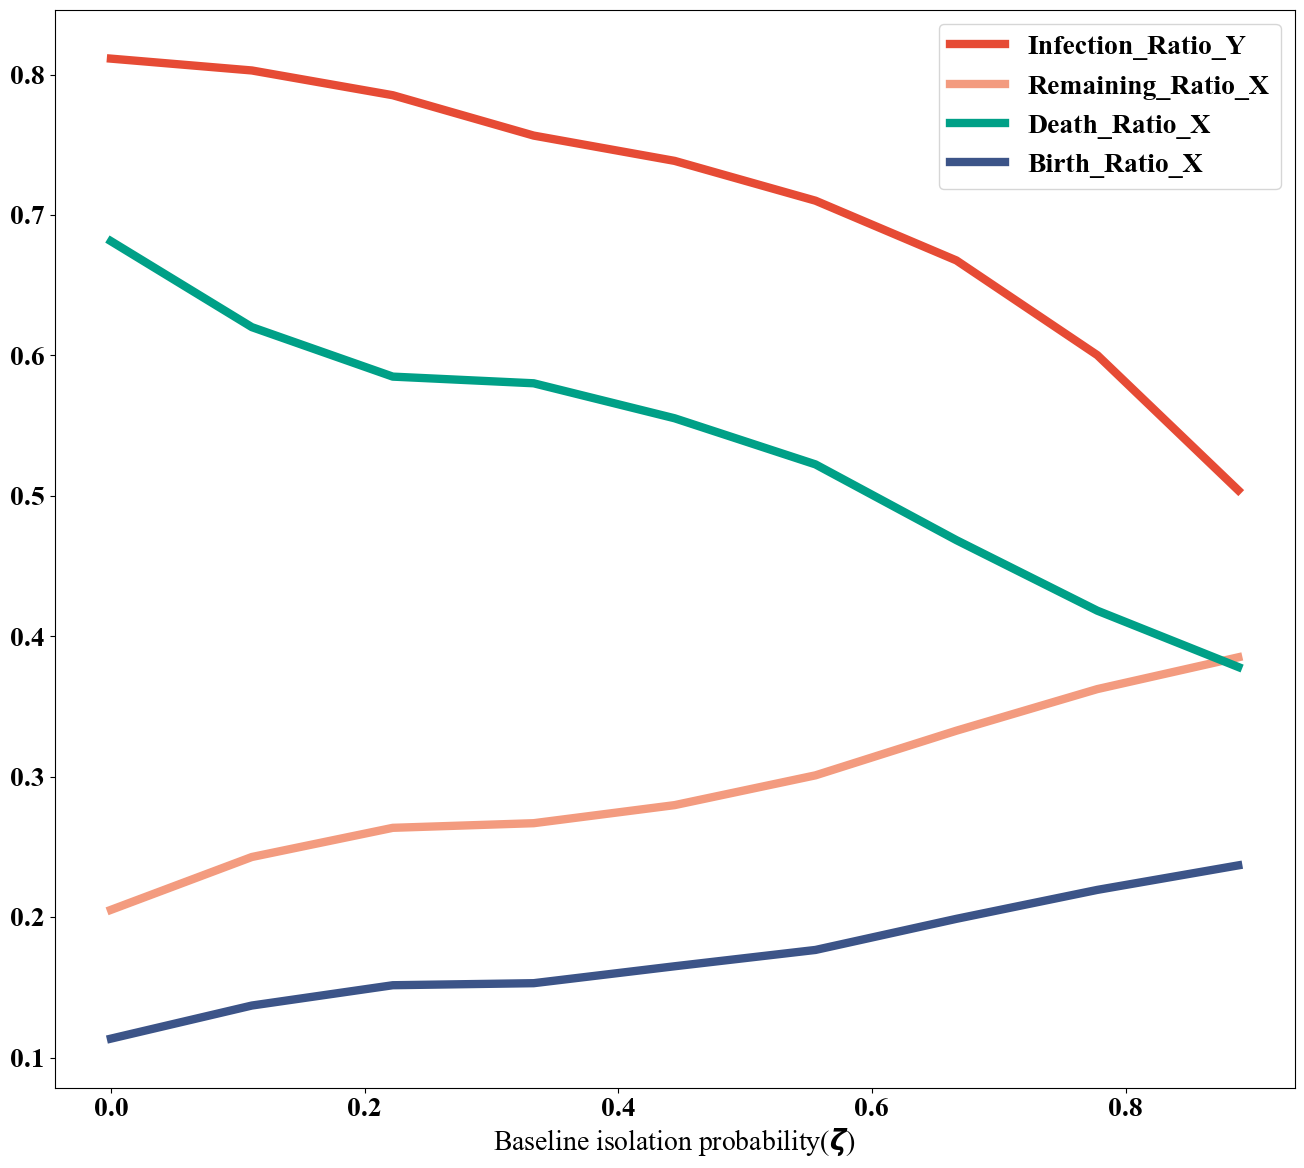

In [14]:
i_color = '#E64B35'
r_color = '#F39B7F'
d_color = '#00A087'
b_color = '#3C5488'
zeta = np.linspace(0, 1, 10)[:-1]

plt.figure(figsize=(16, 14))
plt.subplot(111)
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(results['zeta'], results['i_rate'], color = i_color, label = 'Infection_Ratio_Y', linewidth = 6)
plt.plot(results['zeta'], results['r_rate'], color = r_color, label = 'Remaining_Ratio_X', linewidth = 6)
plt.plot(results['zeta'], results['d_rate'], color = d_color, label = 'Death_Ratio_X', linewidth = 6)
plt.plot(results['zeta'], results['b_rate'], color = b_color, label = 'Birth_Ratio_X', linewidth = 6)
# plt.title('折线图')
plt.xlabel('Baseline isolation probability($\zeta$)')
plt.legend()
plt.show()
# 还需要添加坐标轴title

## 展示不同zeta下的详细过程


 完成第0次迭代

 完成第1次迭代

 完成第2次迭代

 完成第3次迭代

 完成第4次迭代


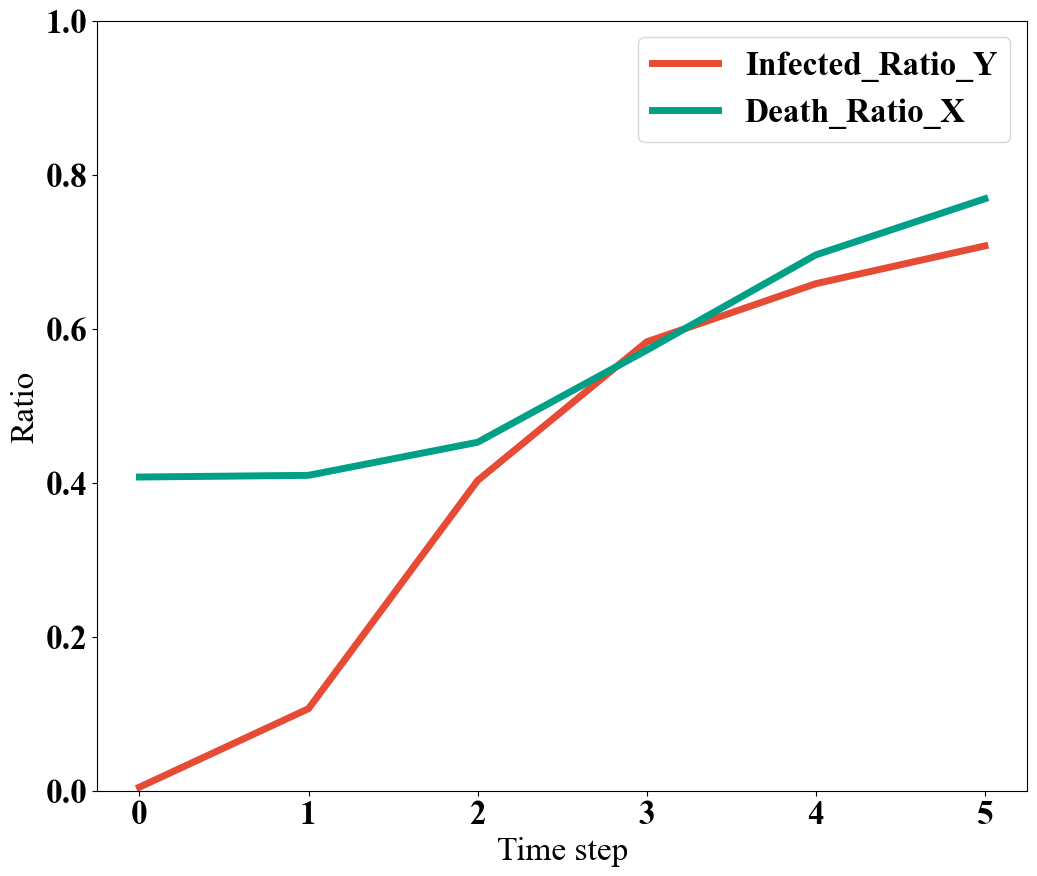

In [69]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，把耦合系数设置为1
# 这种状态表示疫情高发期，需要进行严格的防控

gamma_X_d = 0.41 # 破坏率
gamma_X_r_0 = 0.59  # 初始保留率
gamma_X_b_0 = 0.5  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
zeta = 0   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9 # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表

# gamma_X_i_rs_1 = []
# y_avg_is_1 = []


max_T = 5
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    new_y_state, new_Y_adj = update_y_state_isolation(y_states[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state = update_x_state_RDB_isolation(x_states[-1], y_states[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
    #gamma_X_i_rs_1.append(gamma_X_i_r)
    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表
    #y_avg_is_1.append(y_avg_i)
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果
    print(f'\n 完成第{t}次迭代')

plot_results(y_states, x_states)

In [70]:
with open('test_data_2/x_states_0', 'wb') as f:
    f.write(pickle.dumps(x_states))

with open('test_data_2/y_states_0', 'wb') as f:
    f.write(pickle.dumps(y_states))

In [71]:
with open('test_data_2/x_states_0', 'rb') as f:
    x_states_0 = pickle.load(f)

with open('test_data_2/y_states_0', 'rb') as f:
    y_states_0 = pickle.load(f)

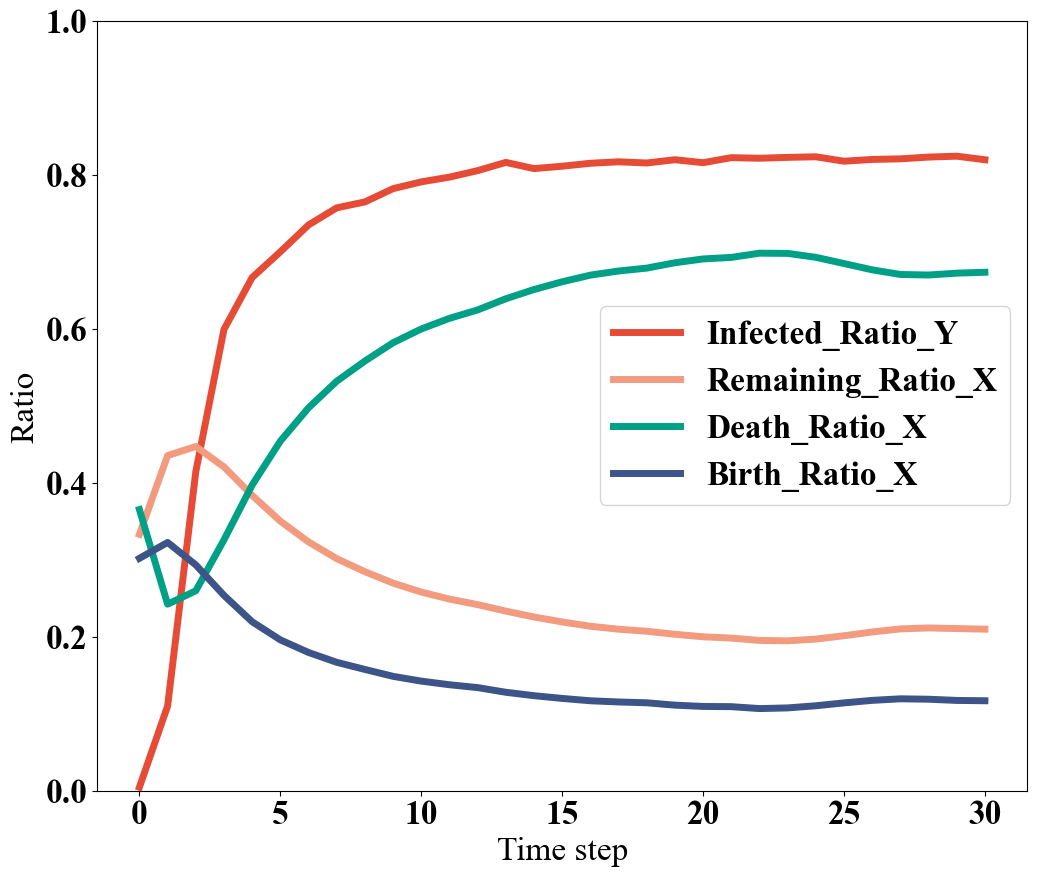

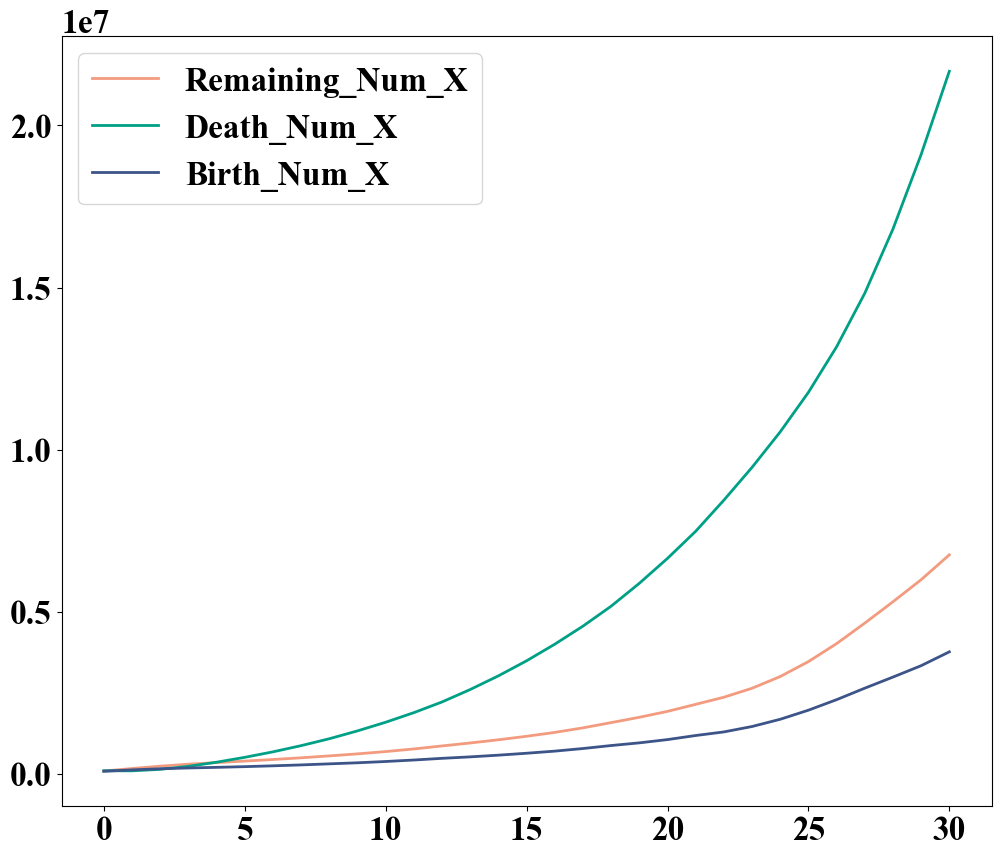

In [19]:
plot_results(y_states_0, x_states_0)

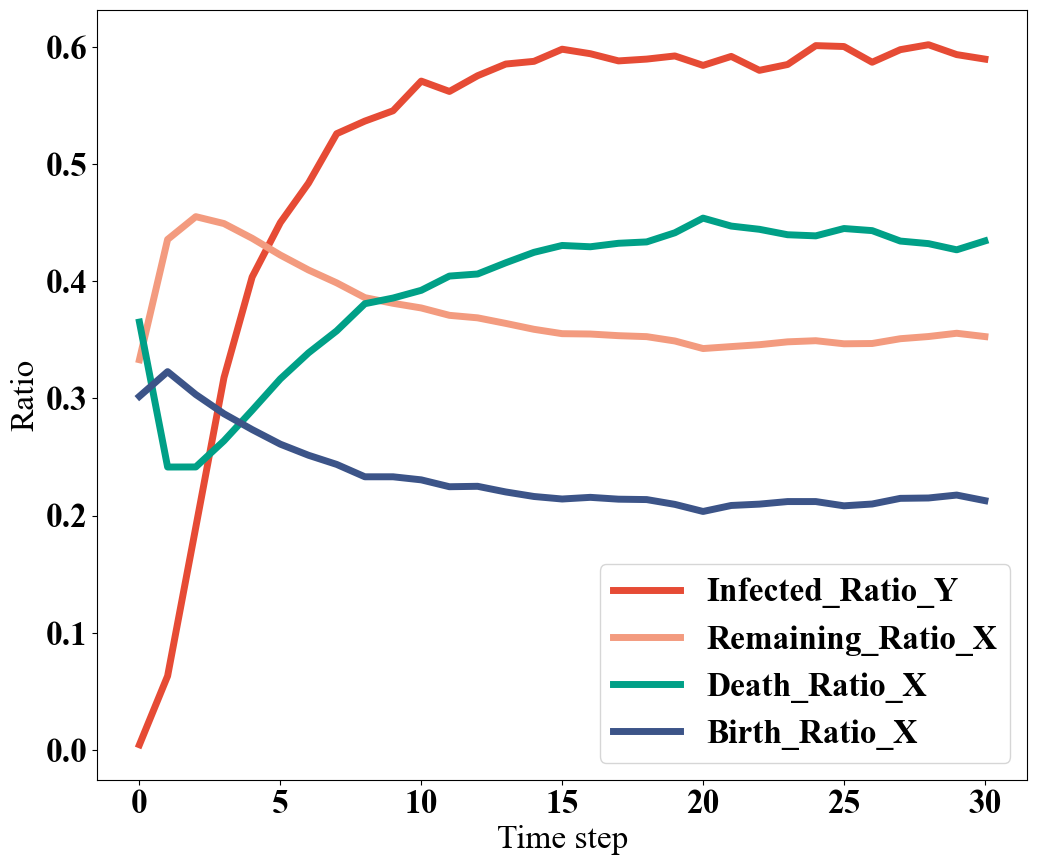

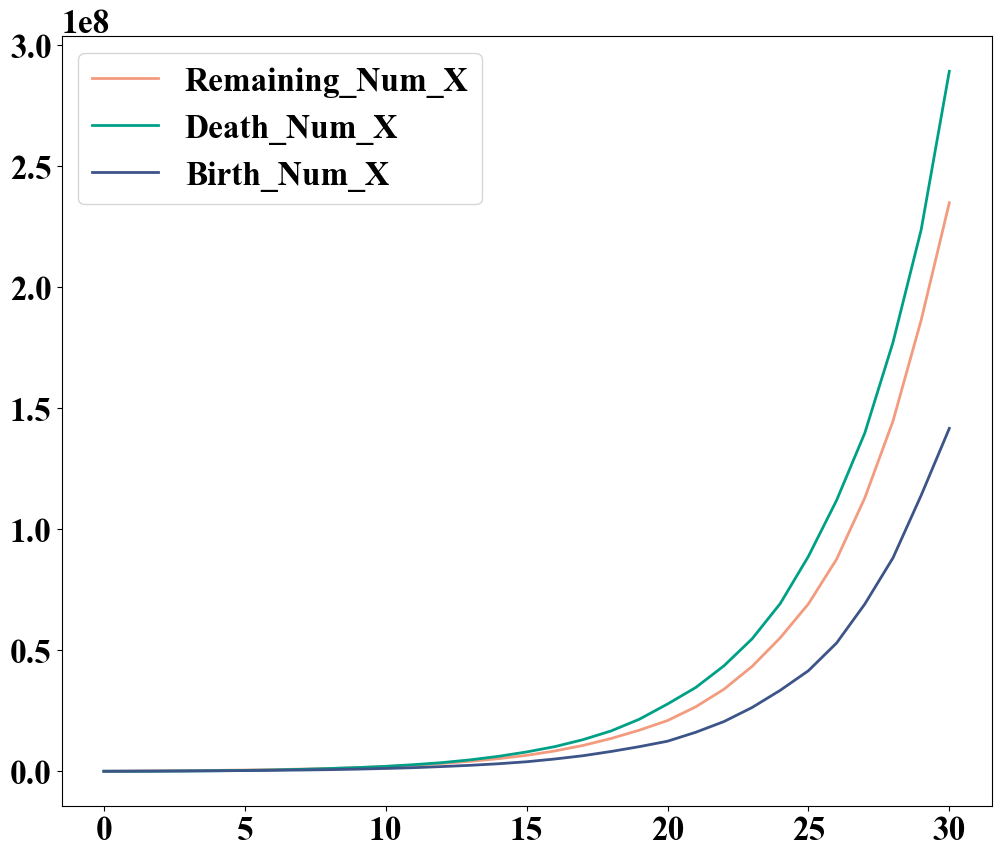

In [40]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，把耦合系数设置为1
# 这种状态表示疫情高发期，需要进行严格的防控

gamma_X_d = 0.5 # 破坏率
gamma_X_r_0 = 0.5  # 初始保留率
gamma_X_b_0 = 0.5  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
zeta = 0.8   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9 # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表

# gamma_X_i_rs_1 = []
# y_avg_is_1 = []


max_T = 30
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    
    new_y_state, new_Y_adj = update_y_state_isolation(y_states[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_isolation(x_states[-1], y_states[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
    #gamma_X_i_rs_1.append(gamma_X_i_r)
    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表
    #y_avg_is_1.append(y_avg_i)
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果

plot_results(y_states, x_states)

In [20]:
with open('x_states_0_8', 'rb') as f:
    x_states_0_8 = pickle.load(f)

with open('y_states_0_8', 'rb') as f:
    y_states_0_8 = pickle.load(f)

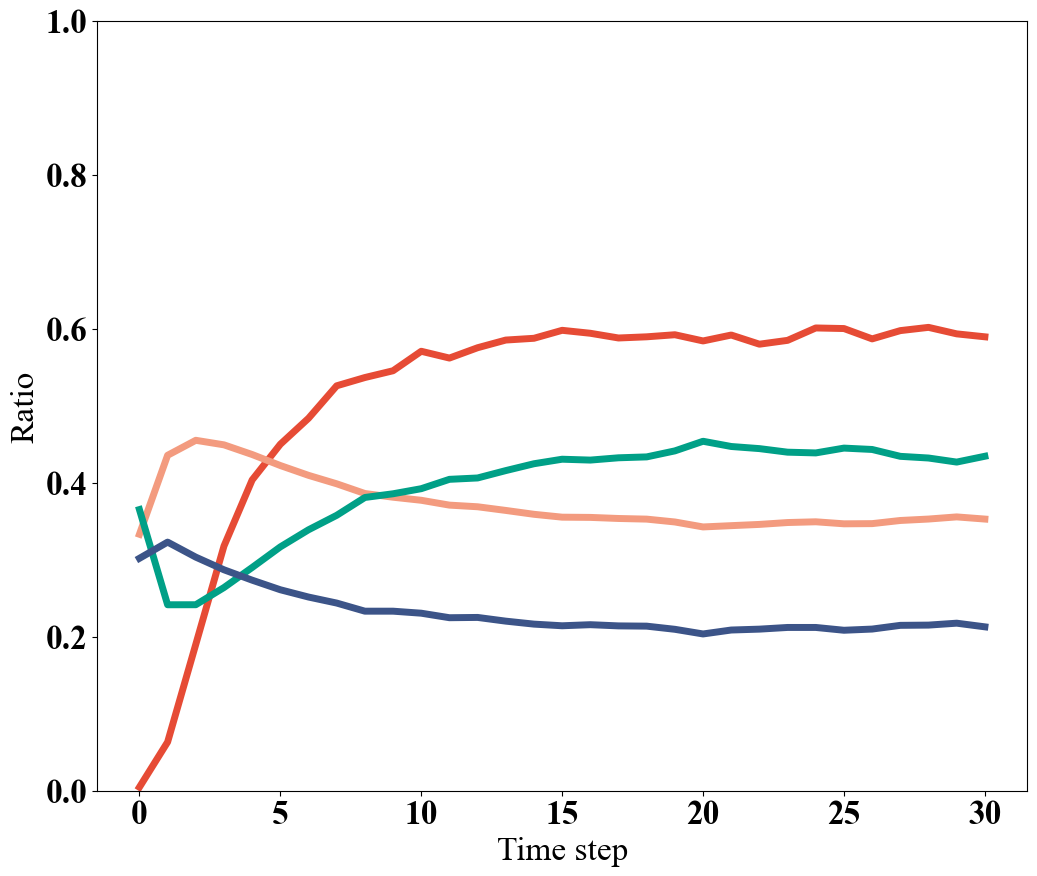

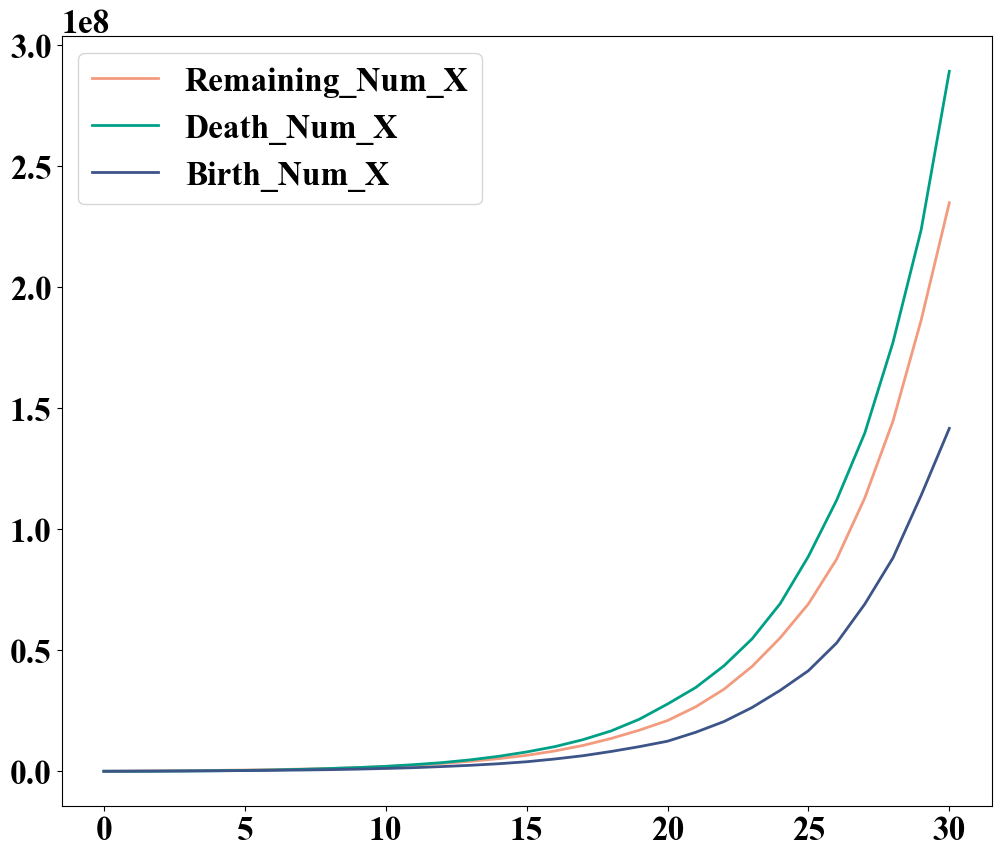

In [21]:
plot_results(y_states_0_8, x_states_0_8, False)

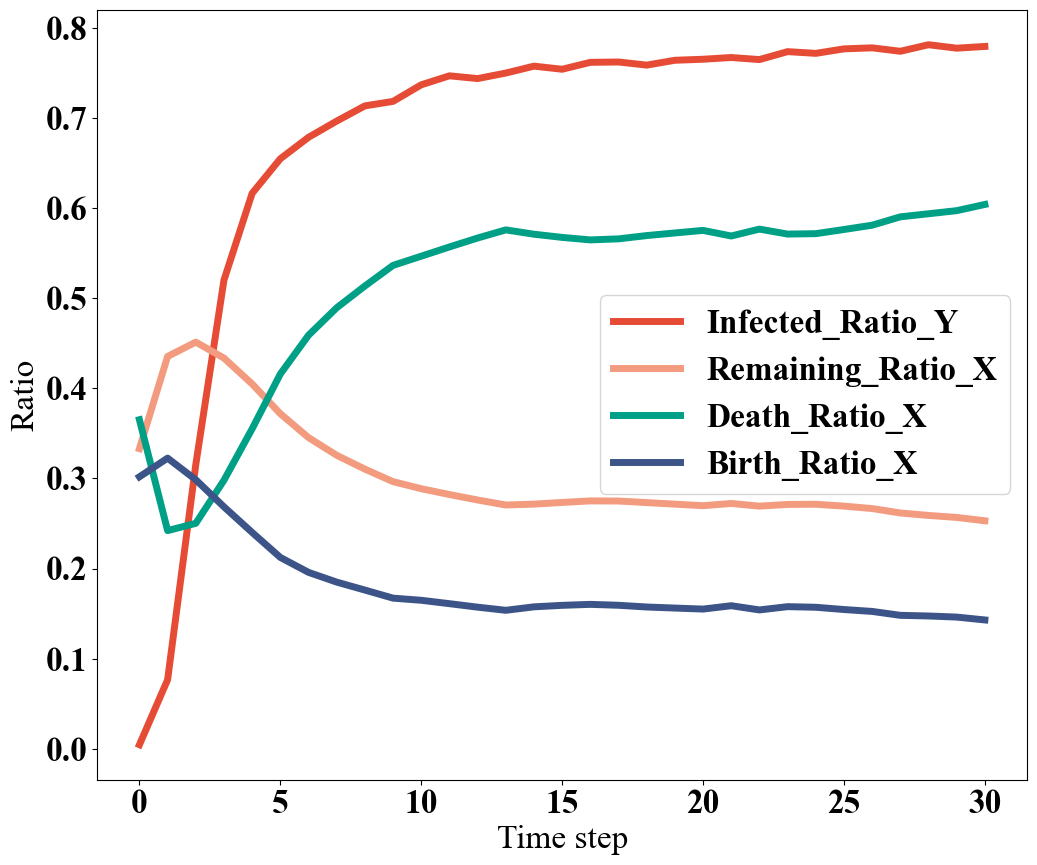

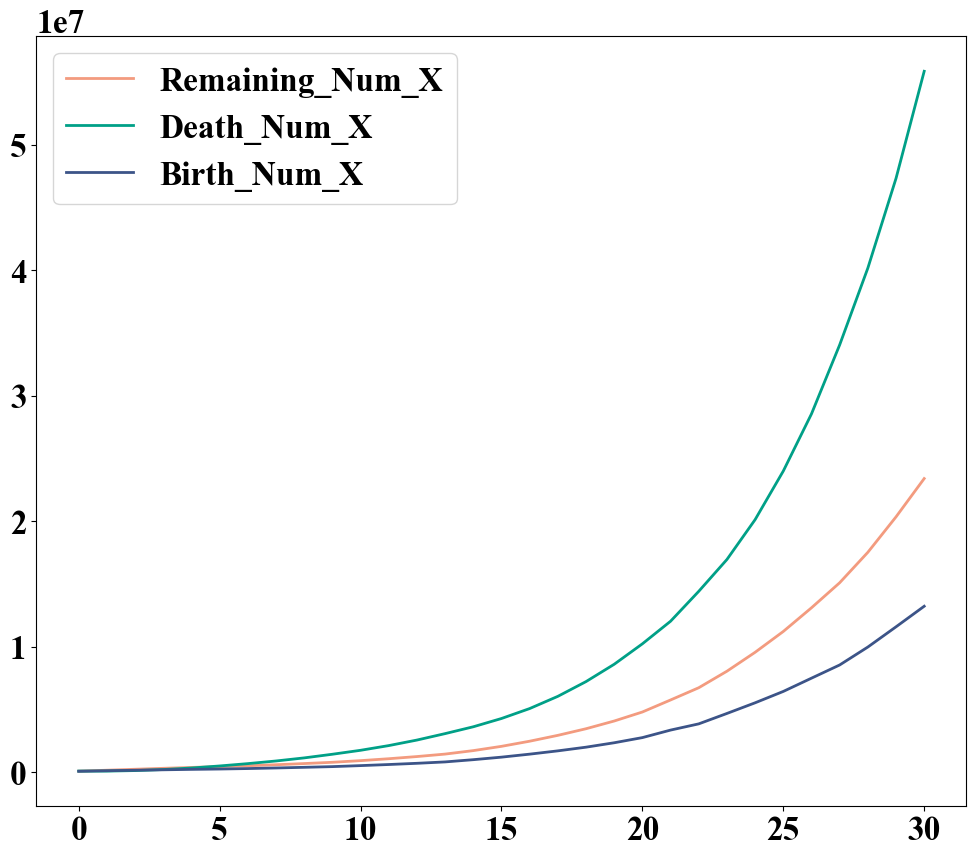

In [22]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，把耦合系数设置为1
# 这种状态表示疫情高发期，需要进行严格的防控

gamma_X_d = 0.5 # 破坏率
gamma_X_r_0 = 0.5  # 初始保留率
gamma_X_b_0 = 0.5  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
zeta = 0.3   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9 # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表

gamma_X_i_rs_1 = []
y_avg_is_1 = []


max_T = 30
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    
    new_y_state, new_Y_adj = update_y_state_isolation(y_states[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_isolation(x_states[-1], y_states[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
    #gamma_X_i_rs_1.append(gamma_X_i_r)
    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表
    #y_avg_is_1.append(y_avg_i)
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果

plot_results(y_states, x_states, label = False)

In [22]:
with open('x_states_0_3', 'rb') as f:
    x_states_0_3 = pickle.load(f)

with open('y_states_0_3', 'rb') as f:
    y_states_0_3 = pickle.load(f)

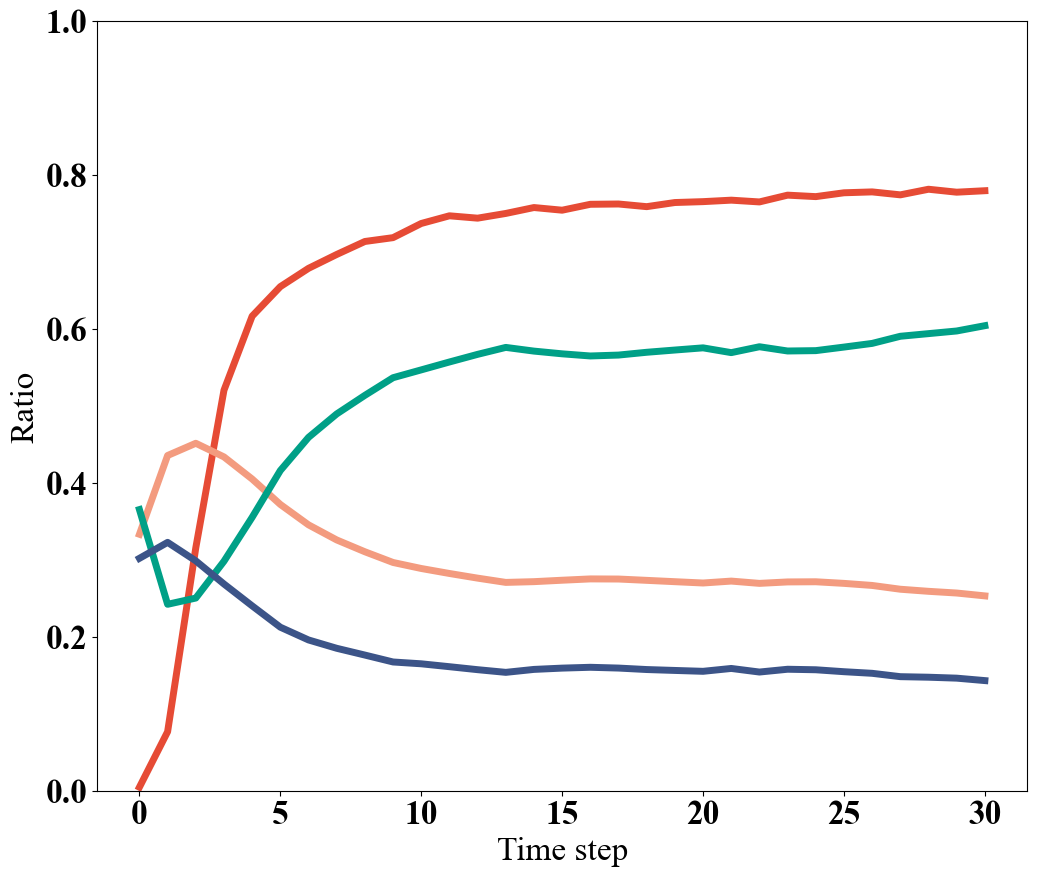

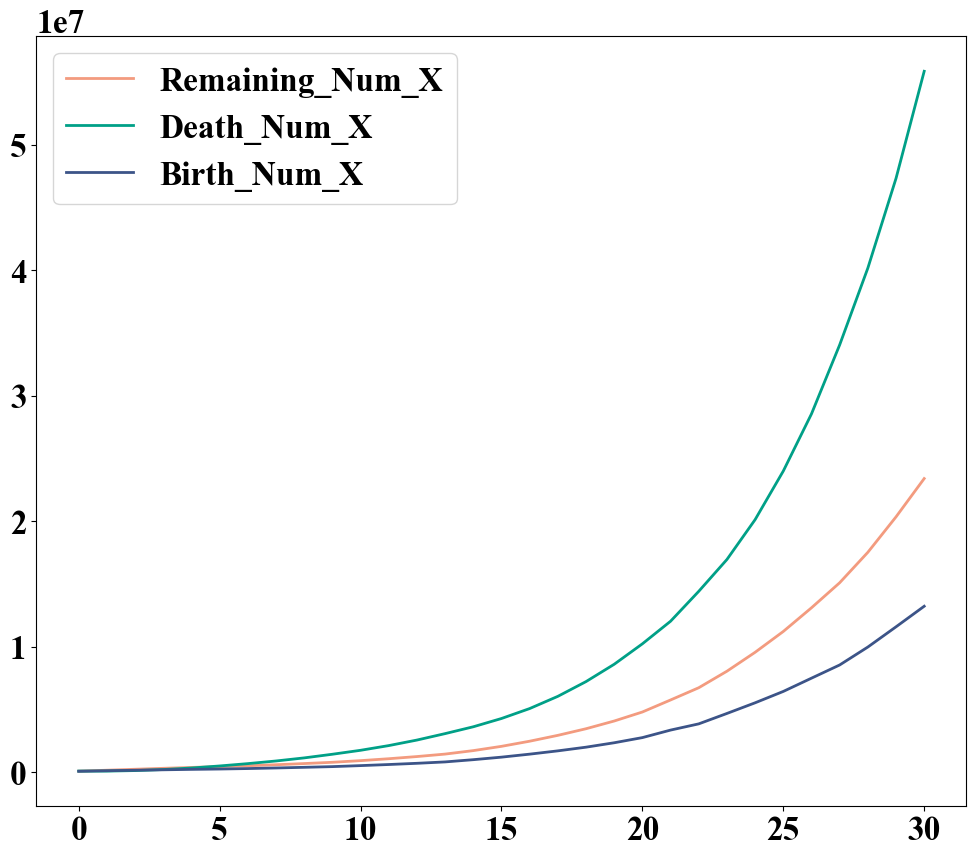

In [24]:
plot_results(y_states_0_3, x_states_0_3, legend = False)

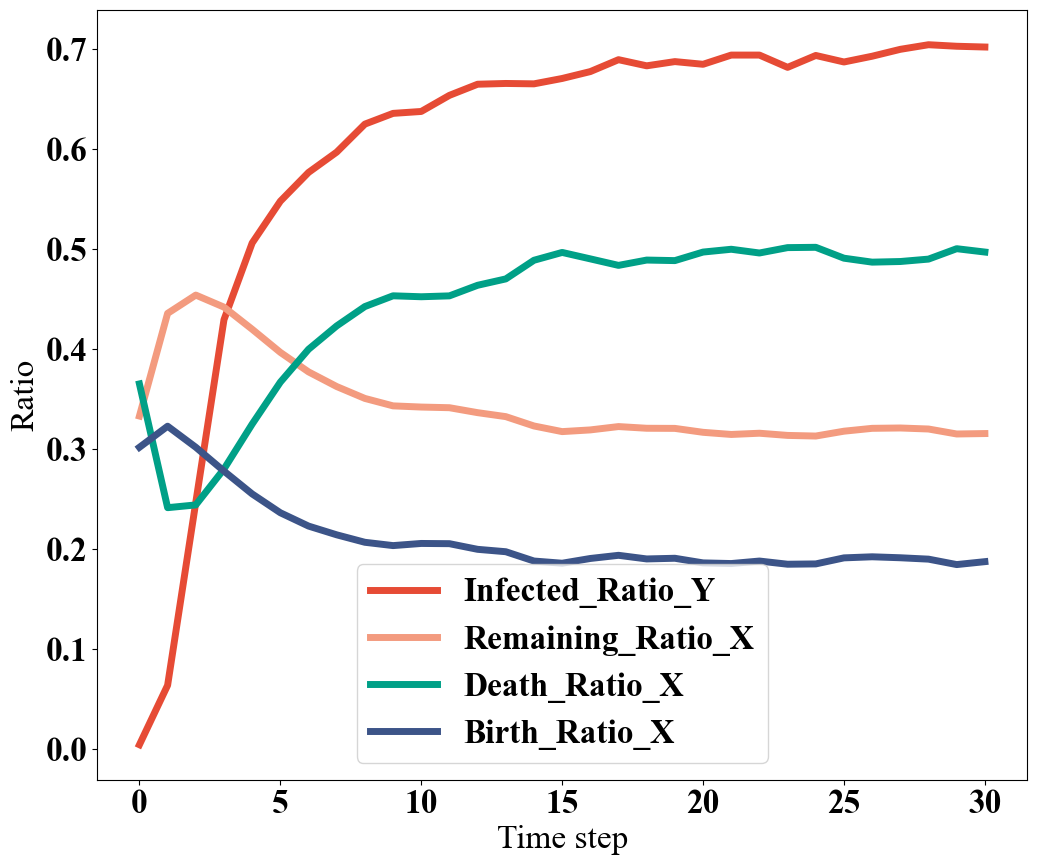

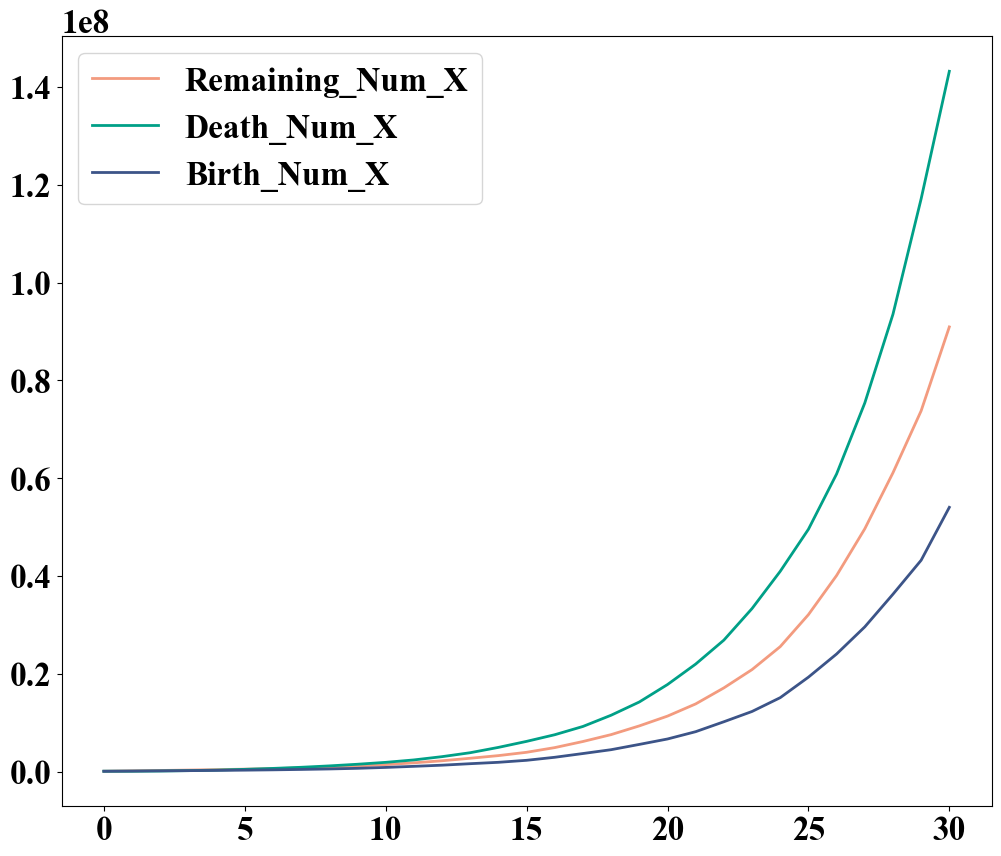

In [18]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，把耦合系数设置为1
# 这种状态表示疫情高发期，需要进行严格的防控

gamma_X_d = 0.5 # 破坏率
gamma_X_r_0 = 0.5  # 初始保留率
gamma_X_b_0 = 0.5  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
zeta = 0.6   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9 # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表

gamma_X_i_rs_1 = []
y_avg_is_1 = []


max_T = 30
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    
    new_y_state, new_Y_adj = update_y_state_isolation(y_states[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_isolation(x_states[-1], y_states[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
    #gamma_X_i_rs_1.append(gamma_X_i_r)
    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表
    #y_avg_is_1.append(y_avg_i)
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果

plot_results(y_states, x_states)

In [25]:
with open('x_states_0_6', 'rb') as f:
    x_states_0_6 = pickle.load(f)

with open('y_states_0_6', 'rb') as f:
    y_states_0_6 = pickle.load(f)

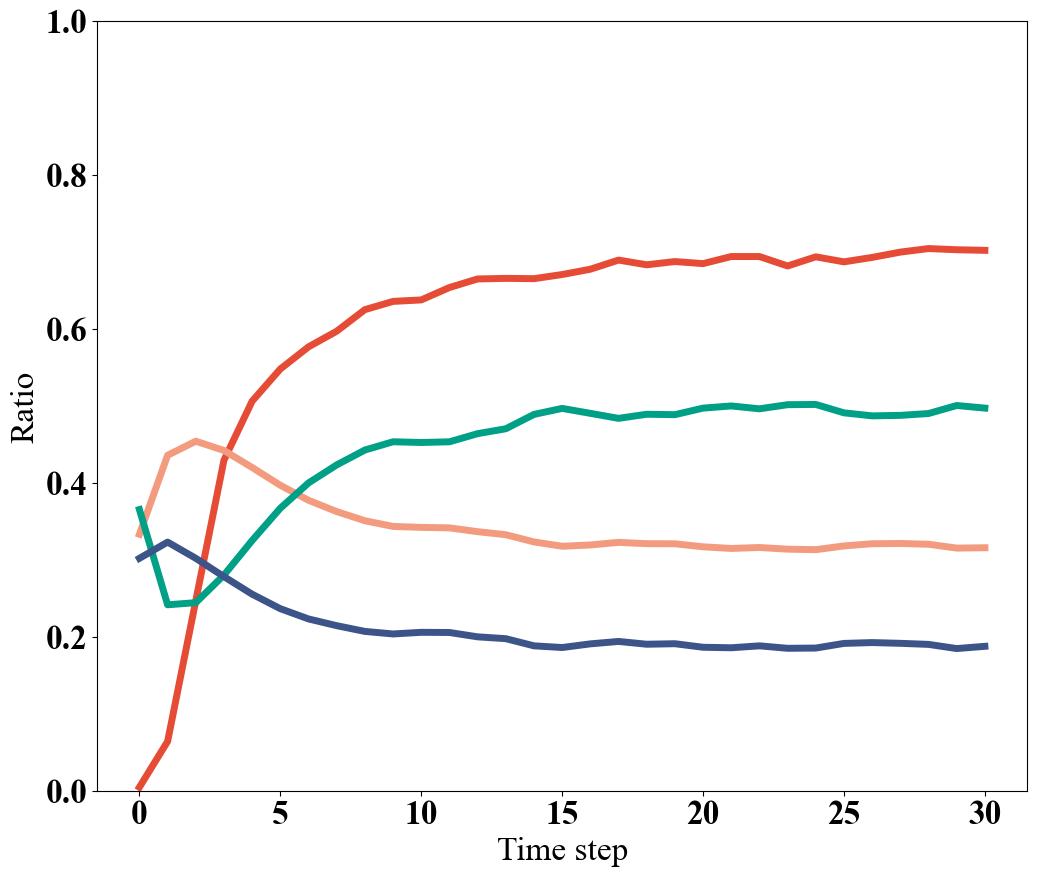

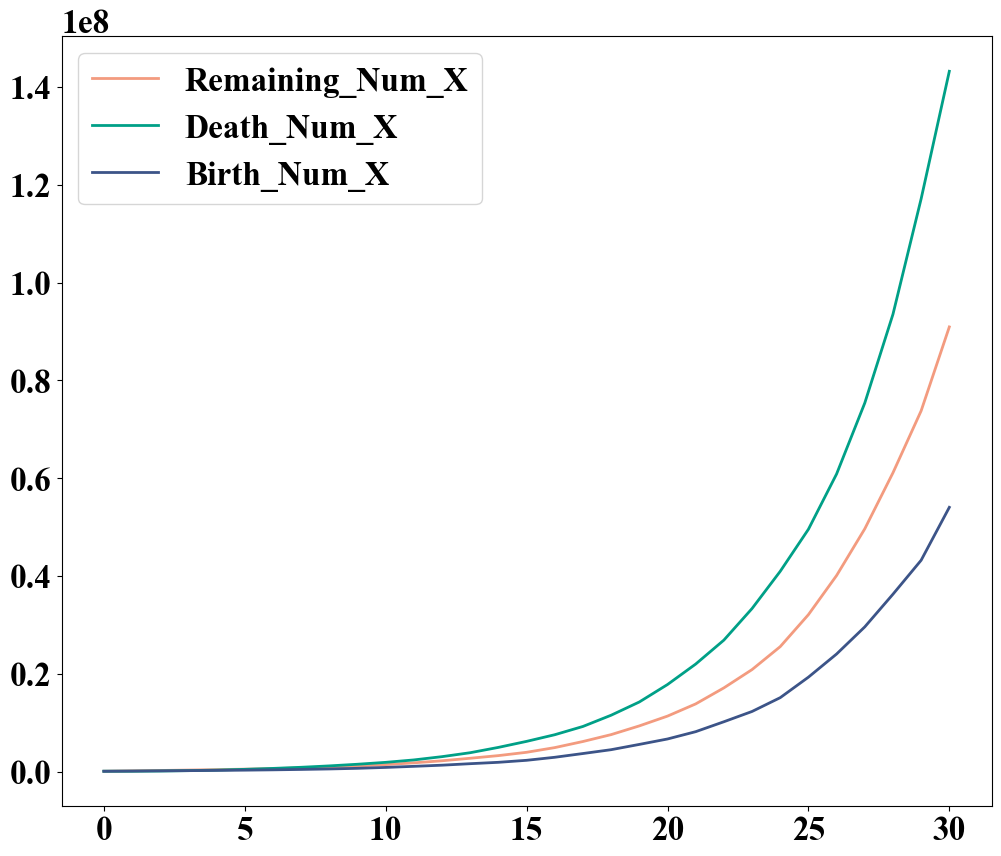

In [26]:
plot_results(y_states_0_6, x_states_0_6, False)

- 要让Y网络的变化显著影响到X网络，除了alpha设定要大外，还要保留率和新生率的初始值要大，两者缺一不可。
- 一个比较奇特的发现，如果换了耦合网络数据，death_num和remainning_num之间的关系发生了变化

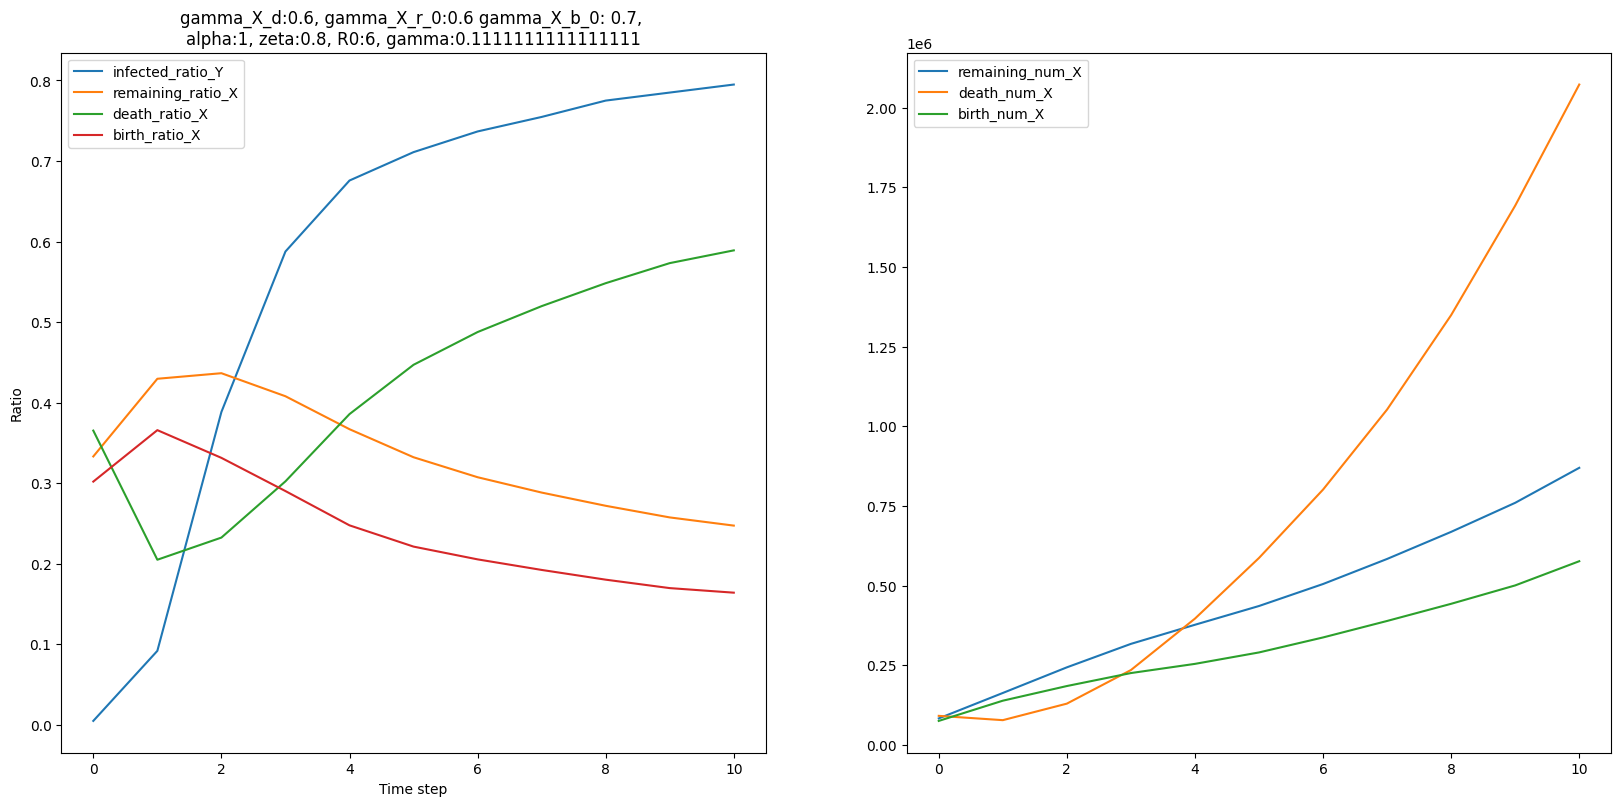

In [76]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，把耦合系数设置为0.8
# 这种状态表示疫情高发期，需要进行严格的防控

gamma_X_d = 0.6 # 破坏率
gamma_X_r_0 = 0.6  # 初始保留率
gamma_X_b_0 = 0.7  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
zeta = 0.8   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9  # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表




max_T = 10
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    
    new_y_state = update_y_state_noquarantine(y_states[-1], R0, gamma) # 更新移动网络Y上的状态
    new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_noqurantine(x_states[-1], y_states[-1], gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态

    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表

    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果

plot_results(y_states, x_states)

## 开始在中期引入精准防控政策

In [16]:
max_T = 20
# 设定最大时间步为1000

time_cutoff = 10
y_states_pre = [y_state_pre] 
# 初始化移动网络Y上的状态列表
x_states_pre = [x_state_2019] # 使用2021年的数据来做模拟
# 初始化餐馆网络X上的状态列表

In [18]:
for t in range(time_cutoff): 
    gamma_X_d = 0.2 # 破坏率
    gamma_X_r_0 = 0.8  # 初始保留率
    gamma_X_b_0 = 0.5  # 初始新生率
    alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
    zeta = 0.6  # 因为没有隔离政策，所以隔离的比例为0
    R0 = 6  # 基本再生数
    gamma = 1/9  # 治愈率，分母为感染周期
    new_y_state, new_Y_adj = update_y_state_isolation(y_states_pre[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state= update_x_state_RDB_isolation(x_states_pre[-1], y_states_pre[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha, Z_adj_2019) # 更新餐馆网络X上的状态

    y_states_pre.append(new_y_state) # 添加到状态列表
    x_states_pre.append(new_x_state) # 添加到状态列表
    print(f'\n 完成第{t+1}次迭代')


 完成第1次迭代

 完成第2次迭代

 完成第3次迭代

 完成第4次迭代

 完成第5次迭代

 完成第6次迭代

 完成第7次迭代

 完成第8次迭代

 完成第9次迭代

 完成第10次迭代


In [19]:
y_states_post = [y_states_pre[-1]] 
# 初始化移动网络Y上的状态列表
x_states_post = [x_states_pre[-1]] 

In [22]:
# 初始化餐馆网络X上的状态列表
for t in range(time_cutoff, max_T):    
    # 遍历每个时间步
    gamma_X_d = 0.2 # 破坏率
    gamma_X_r_0 = 0.8  # 初始保留率
    gamma_X_b_0 = 0.5  # 初始新生率
    alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
    zeta = 0.9  # 隔离的比例
    R0 = 6  # 基本再生数
    gamma = 1/9  # 治愈率，分母为感染周期
    new_y_state, new_Y_adj = update_y_state_isolation(y_states_post[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state= update_x_state_RDB_isolation(x_states_post[-1], y_states_post[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha, Z_adj = Z_adj_2019) # 更新餐馆网络X上的状态
    # gamma_X_i_rs_1.append(gamma_X_i_r)
    y_states_post.append(new_y_state) # 添加到状态列表
    x_states_post.append(new_x_state) # 添加到状态列表
    #y_avg_is_1.append(y_avg_i)
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果
    print(f'\n 完成第{t+1}次迭代')


 完成第11次迭代

 完成第12次迭代

 完成第13次迭代

 完成第14次迭代

 完成第15次迭代

 完成第16次迭代

 完成第17次迭代

 完成第18次迭代

 完成第19次迭代

 完成第20次迭代


In [22]:
file_id = 7


In [ ]:
with open(f'test_data_{file_id}/x_states_pre', 'wb') as f:
    f.write(pickle.dumps(x_states_pre))

with open(f'test_data_{file_id}/y_states_pre', 'wb') as f:
    f.write(pickle.dumps(y_states_pre))


In [34]:

with open(f'test_data_{file_id}/x_states_post', 'wb') as f:
    f.write(pickle.dumps(x_states_post))

with open(f'test_data_{file_id}/y_states_post', 'wb') as f:
    f.write(pickle.dumps(y_states_post))

In [48]:
file_id = 4

with open(f'test_data_{file_id}/x_states_pre', 'rb') as f:
    x_states_pre = pickle.load(f)

with open(f'test_data_{file_id}/y_states_pre', 'rb') as f:
    y_states_pre = pickle.load(f)

with open(f'test_data_{file_id}/x_states_post', 'rb') as f:
    x_states_post = pickle.load(f)

with open(f'test_data_{file_id}/y_states_post', 'rb') as f:
    y_states_post = pickle.load(f)

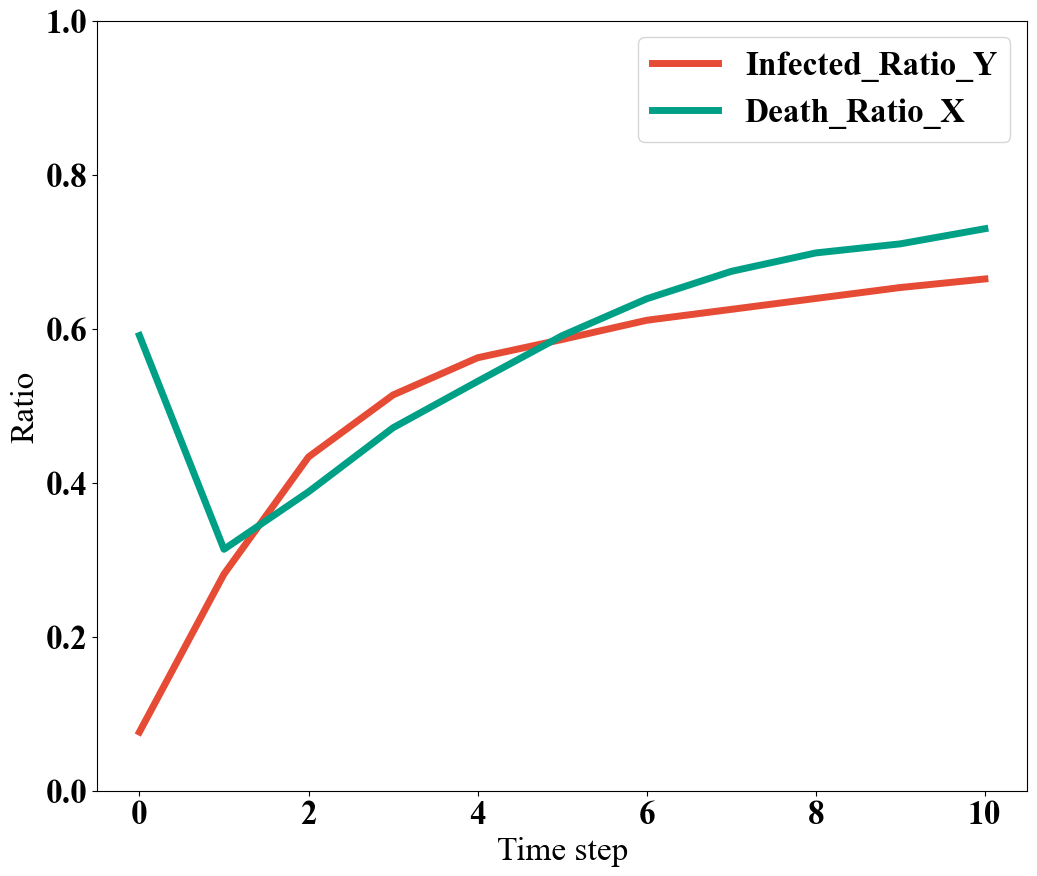

In [23]:
plot_results(y_states_pre, x_states_pre)

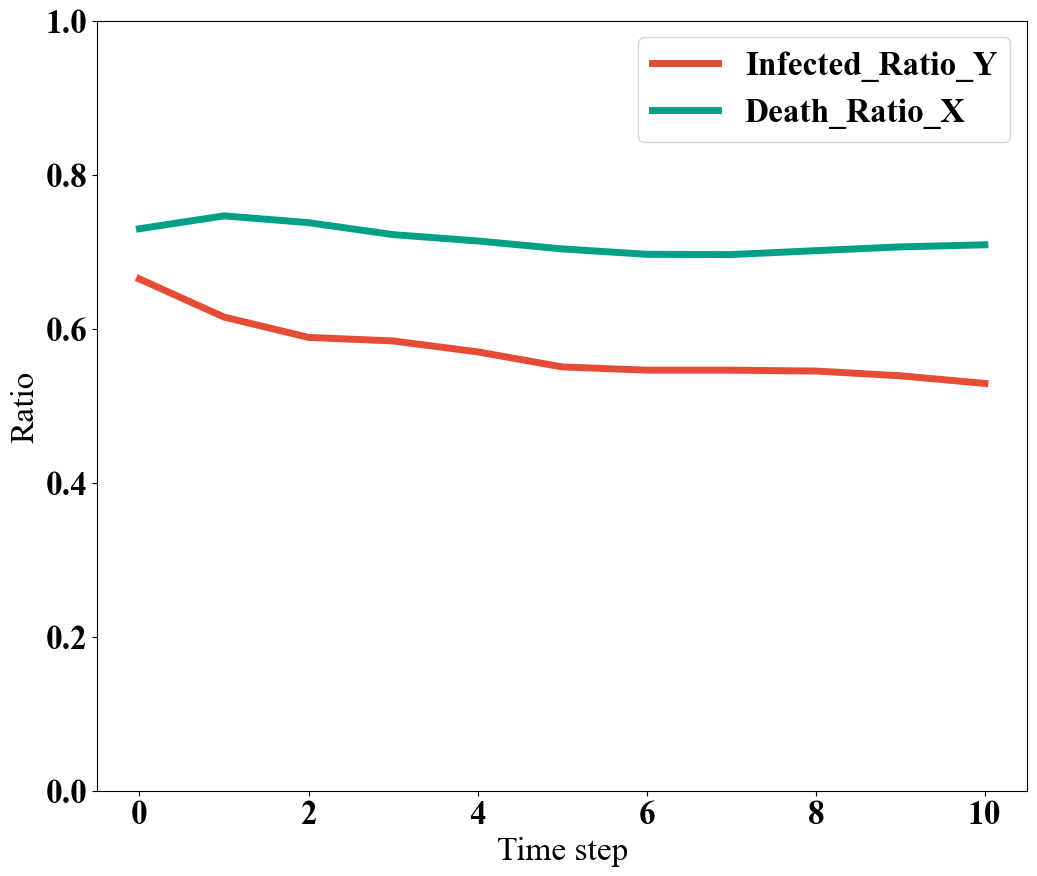

In [24]:
plot_results(y_states_post, x_states_post)

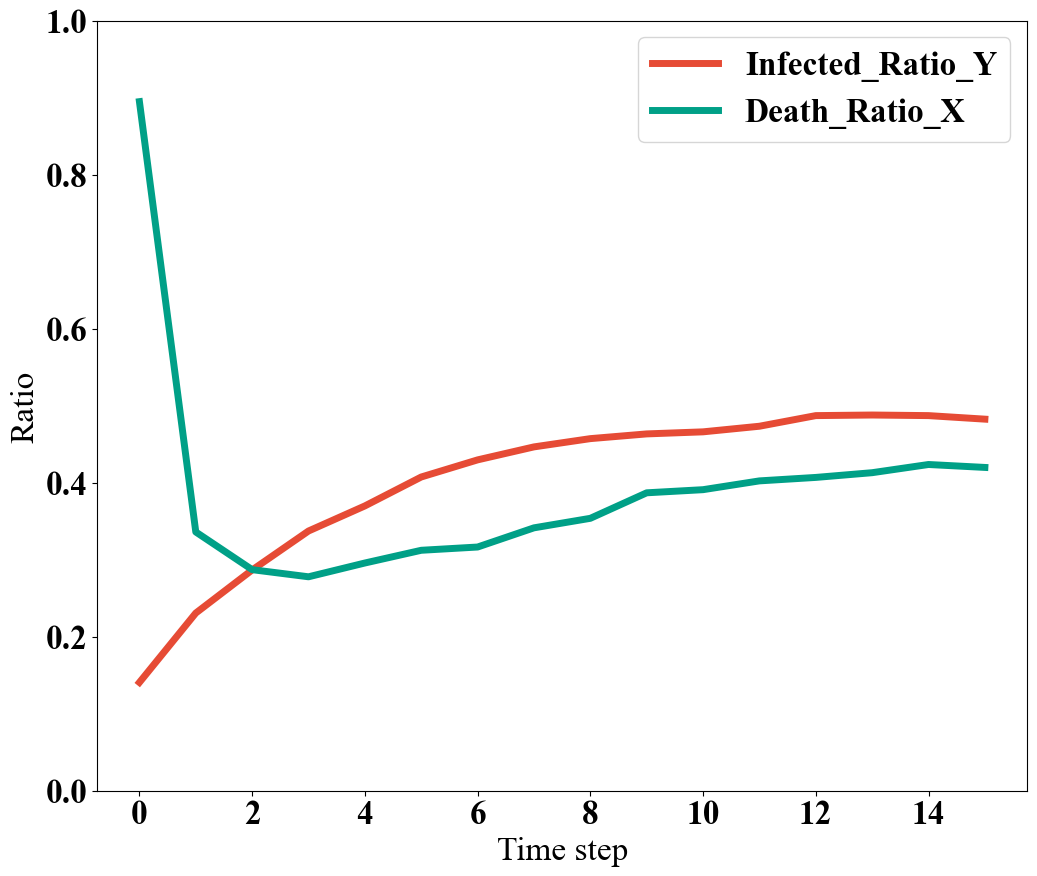

In [69]:
plot_results(y_states_post, x_states_post)

In [89]:
# 对疫情采取封控措施
gamma_X_d = 0.5 # 破坏率
gamma_X_r_0 = 0.5  # 初始保留率
gamma_X_b_0 = 0.5  # 初始新生率
alpha = 1  # 网络间的耦合系数，完全耦合，提高Y网络对X网络的影响
zeta = 0.9   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 1/9  # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表




max_T = 30
# 设定最大时间步为1000

time_cutoff = 10

for t in range(max_T): 
    if t < time_cutoff:
        new_y_state = update_y_state_noquarantine(y_states[-1], R0, gamma) # 更新移动网络Y上的状态
        new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_noqurantine(x_states[-1], y_states[-1], gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态

        y_states.append(new_y_state) # 添加到状态列表
        x_states.append(new_x_state) # 添加到状态列表

    else:
    # 遍历每个时间步
        new_y_state, new_Y_adj = update_y_state_isolation(y_states[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
        new_x_state, gamma_X_i_r, y_avg_i = update_x_state_RDB_isolation(x_states[-1], y_states[-1], new_Y_adj, gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
        # gamma_X_i_rs_1.append(gamma_X_i_r)
        y_states.append(new_y_state) # 添加到状态列表
        x_states.append(new_x_state) # 添加到状态列表
        #y_avg_is_1.append(y_avg_i)
        # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
        #     break;# 如果两层网络都达到稳态，跳出循环
        #     # 调用绘图函数，展示结果

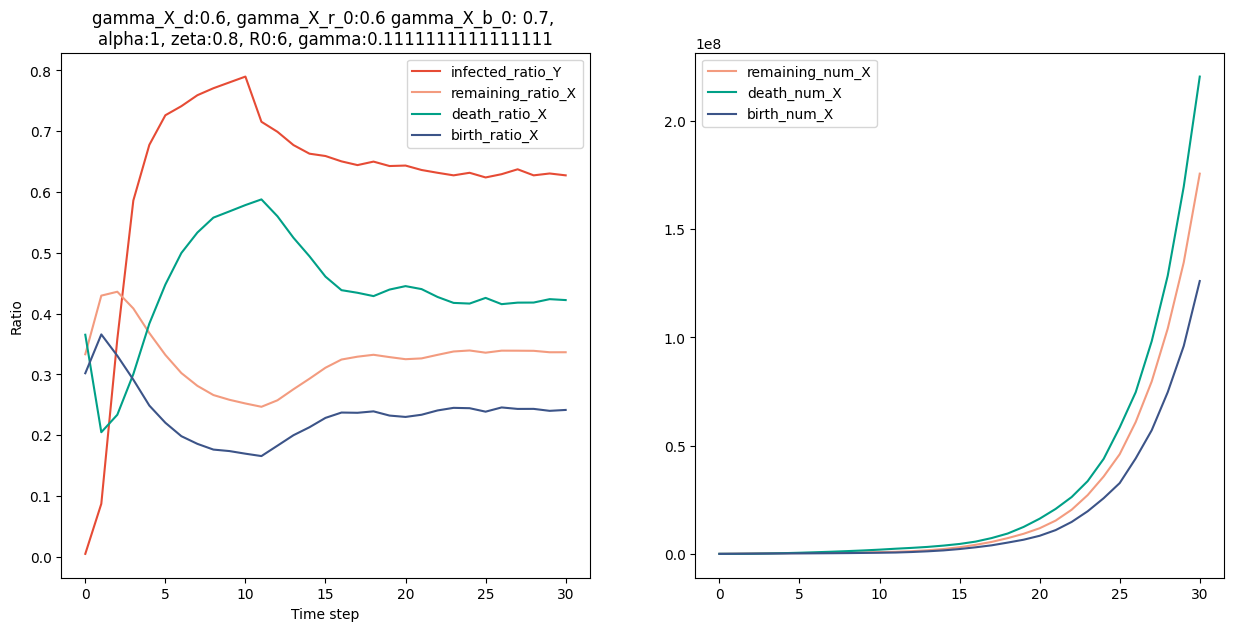

In [90]:
plot_results(y_states, x_states)

alpha也就是耦合系数的下降，会影响到餐馆死亡数量的上升。导致死亡率的下降，以及新生率的上升

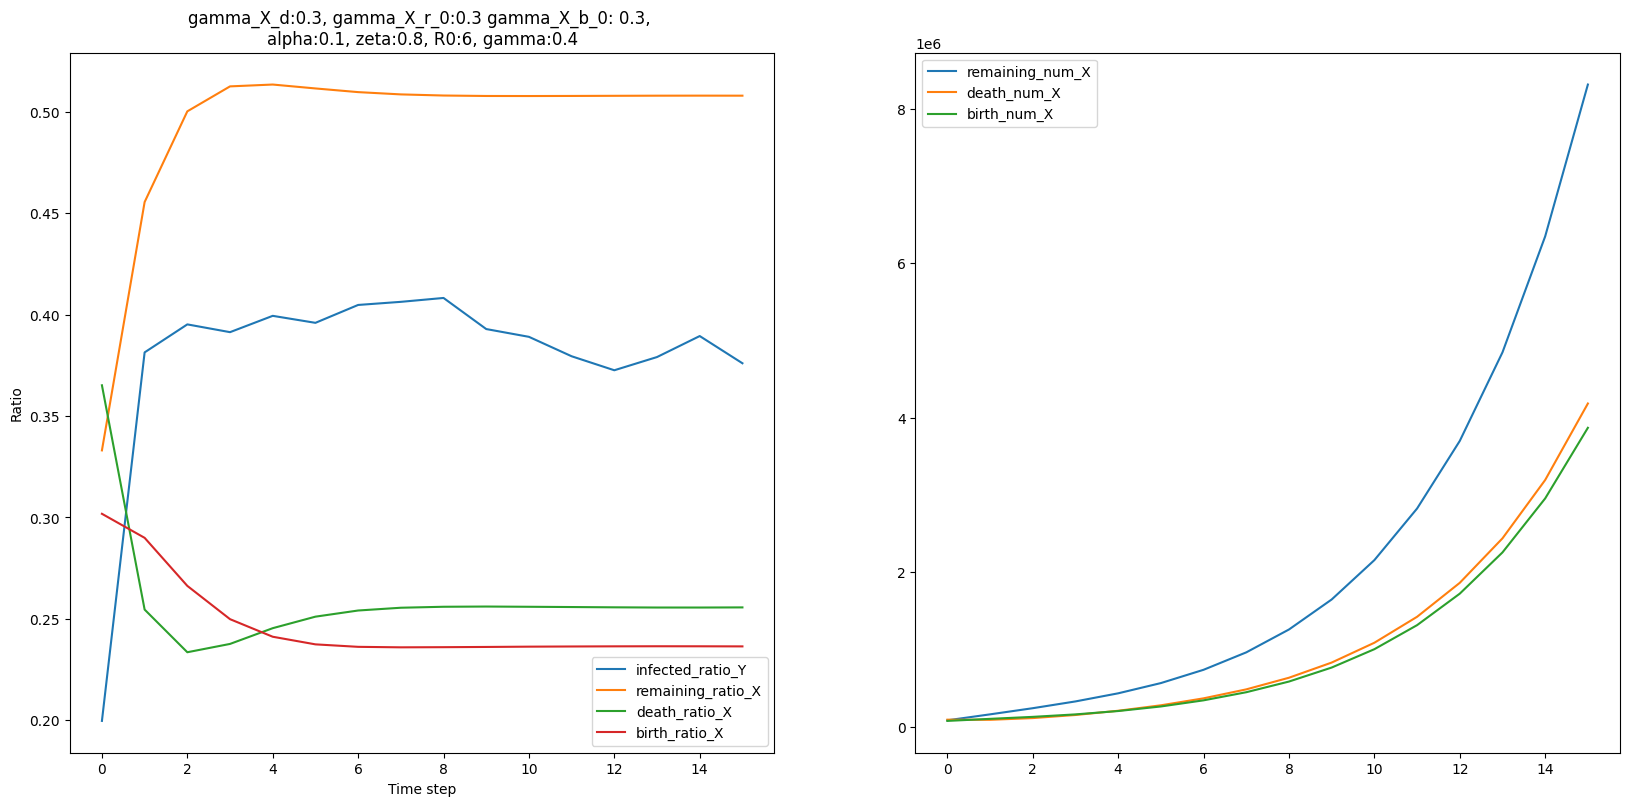

In [61]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，进一步降低了耦合系数
# 这种状态表示疫情高发期，需要进行严格的防控

gamma_X_d = 0.3 # 破坏率
gamma_X_r_0 = 0.3  # 初始保留率
gamma_X_b_0 = 0.3  # 初始新生率
alpha = 0.1  # 网络间的耦合系数
zeta = 0.8   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 2/5  # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表

max_T = 15
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    
    new_y_state = update_y_state_isolation(y_states[-1], zeta, R0, gamma) # 更新移动网络Y上的状态
    new_x_state = update_x_state_RDB(x_states[-1], y_states[-1], gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
    
    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表
    
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果

plot_results(y_states, x_states)

这个时候的新增餐馆数目的增长曲线和死亡餐馆数目的增长曲线更为接近，说明网络之间的耦合程度越低，餐馆网络受到的破坏越小，被保留的餐馆数量会增加

In [71]:
# 这里我设置了较低的破坏率，较低的保留率，较低的新生率，把耦合系数设置为0.8
# 并且我使用了noquarantine来更新y的状态，表示这个时候病毒是随机传播的

gamma_X_d = 0.3 # 破坏率
gamma_X_r_0 = 0.3  # 初始保留率
gamma_X_b_0 = 0.3  # 初始新生率
alpha = 0.8  # 网络间的耦合系数
zeta = 0.8   # 隔离的比例
R0 = 6  # 基本再生数
gamma = 2/5  # 治愈率，分母为感染周期
# 循环执行更新函数，并记录每个时间步的结果，直到达到稳态或者达到最大时间步

y_states = [y_state] 
# 初始化移动网络Y上的状态列表
x_states = [x_state] 
# 初始化餐馆网络X上的状态列表

max_T = 15
# 设定最大时间步为1000

for t in range(max_T): 
# 遍历每个时间步
    
    new_y_state = update_y_state_noquarantine(y_states[-1], R0, gamma) # 更新移动网络Y上的状态
    new_x_state = update_x_state_RDB(x_states[-1], y_states[-1], gamma_X_d, gamma_X_r_0, gamma_X_b_0, alpha) # 更新餐馆网络X上的状态
    
    y_states.append(new_y_state) # 添加到状态列表
    x_states.append(new_x_state) # 添加到状态列表
    
    # if np.all(new_y_state == y_states[-2]) and np.all(new_x_state == x_states[-2]): 
    #     break;# 如果两层网络都达到稳态，跳出循环
    #     # 调用绘图函数，展示结果

plot_results(y_states, x_states)

KeyboardInterrupt: 

zeta变大似乎使得疫情变得更为严重，而且Y的变化并没有对X网络上产生什么变化

- infected_ratio_Y: 移动网络上感染病毒导致失灵的比例
- remaining_ratio_X: 餐馆网络上存活餐馆的数量
- death_ratio_X: 餐馆网络上死亡餐馆的数量
- birth_ratio_X: 餐馆网络上新生参观的数量